<a href="https://colab.research.google.com/github/DrKenReid/GoodReads-Analysis/blob/main/GoodReads_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Getting and importing the data.
The Goodreads data can be found on your profile on GoodReads, under My Books -> Import/Export at the bottom left of the screen.
I've included my stats file (up to January 2023) for reference, but feel free to replace this file with your own.

The URL for *my* stats is [https://www.goodreads.com/review/list/42371562](https://www.goodreads.com/review/list/42371562), but you can find yours by clicking your avatar at the top right once logged in, then go to "Profile", then under "My Books" click "More..." and then "Import/Export":

![Image showing where to find the import/export on Goodreads](https://raw.githubusercontent.com/DrKenReid/GoodReads-Analysis/main/img/books.png)

Upload the CSV into this colab, then modify the code below to point to it (put a '#' at the start of line 3, then remove the '#' on line 4, and change the 'my_data.csv' to the name of your file). Read in the CSV with pandas:


In [ ]:
import pandas as pd
import numpy as np
raw_goodreads = pd.read_csv('https://raw.githubusercontent.com/DrKenReid/GoodReadsCSV/main/goodreads_library_export.csv')
#raw_goodreads = pd.read_csv('my_data.csv')
raw_goodreads.size

20547

If you're like me and dislike the lack of data from GoodReads regarding book information in this file (specifically genre data), then you can make use of this tool here to enhance your CSV: [https://github.com/PaulKlinger/Enhance-GoodReads-Export](https://github.com/PaulKlinger/Enhance-GoodReads-Export).

I'll put all the plots using the enhanced version into their own separate file, as well as the data cleaning for that column.

# Manual Data Inspection

Let's have a look at the data and see what's what:

In [ ]:
raw_goodreads.head()

,Book Id,Title,Author,Author l-f,Additional Authors,ISBN,ISBN13,My Rating,Average Rating,Publisher,...,Bookshelves with positions,Exclusive Shelf,My Review,Spoiler,Private Notes,Read Count,Owned Copies,read_dates,genres,n_ratings
0,25666046,The North Water,Ian McGuire,"McGuire, Ian",NaN,"=""1627795944""","=""9781627795944""",0,3.99,Henry Holt and Co.,...,currently-reading (#3),currently-reading,NaN,NaN,NaN,1,0,NaN,Historical Fiction|755;Fiction|711;Thriller|19...,29611
1,19057,I Am the Messenger,Markus Zusak,"Zusak, Markus",NaN,"=""""","=""""",0,4.04,Alfred A. Knopf Borzoi Books,...,abandoned (#28),abandoned,NaN,NaN,NaN,0,0,NaN,Young Adult|2642;Fiction|2023;Ya|1268;Mystery|...,153315
2,32796193,How You Decide: The Science of Human Decision ...,Ryan Hamilton,"Hamilton, Ryan",NaN,"=""""","=""""",3,4.27,The Great Courses,...,NaN,read,The first half was fascinating and the second ...,NaN,NaN,1,0,"2023-01-27,2023-02-05",Psychology|18,179
3,461104,The Ascent of Man,Jacob Bronowski,"Bronowski, Jacob",NaN,"=""0316109339""","=""9780316109338""",0,4.20,Little Brown and Company,...,to-read (#368),to-read,NaN,NaN,NaN,0,0,NaN,Science|373;History|276;Non Fiction|203;Philos...,5995
4,13214,I Know Why the Caged Bird Sings (Maya Angelou'...,Maya Angelou,"Angelou, Maya",NaN,"=""0553279378""","=""9780553279375""",0,4.28,Bantam Books,...,to-read (#367),to-read,NaN,NaN,NaN,0,0,NaN,Non Fiction|5027;Classics|4238;Memoir|3034;Non...,494246


This data raises some flags. Not necessarily errors, but things to be wary of going forward:
1. There are many fields with missing data, such as Additional Authors, ISBN, Publisher, Number of Pages.
2. It seems that when a user marks a book as read but doesn't review it, the book rating defaults to '0'. This would be problematic in our analysis if we didn't notice this.
3. The date added field is in YYYY/MM/DD format. I prefer this personally, but we need to take note of this if we plan to parse this information for plotting.
4. This file is a CSV (comma separated value file), so commas are of utmost importance. Thankfully, it seems the commas in additional authors, titles, etc., are escaped (meaning these commas are explicitly highlighted as "not used for separating the data").
5. There is information missing: genres, for example, or gender of authors, or average reviews. This data would be useful in analysing the type of books we read, so we either must find this information elsewhere or not use it.

Looking at the head of this data doesn't explain all the issues, there may be others that appear during analysis, so we must be wary going forward. With that in mind, let's use a powerful pandas method for inspecting all of the data (even if it's useful to do so or not for some columns!)

In [ ]:
raw_goodreads.describe()

,Book Id,My Rating,Average Rating,Number of Pages,Year Published,Original Publication Year,Private Notes,Read Count,Owned Copies,n_ratings
count,7.610000e+02,761.000000,761.000000,744.000000,756.000000,729.000000,0.0,761.000000,761.0,7.610000e+02
mean,1.677371e+07,1.885677,4.061288,393.416667,2008.123016,1952.574760,NaN,0.507227,0.0,3.863834e+05
std,1.979159e+07,2.131547,0.391021,320.933256,10.423964,277.372642,NaN,0.557497,0.0,8.635229e+05
min,1.000000e+00,0.000000,0.000000,3.000000,1925.000000,-700.000000,NaN,0.000000,0.0,0.000000e+00
25%,5.002700e+04,0.000000,3.930000,258.000000,2003.000000,1977.000000,NaN,0.000000,0.0,6.693000e+03
50%,6.587879e+06,0.000000,4.110000,354.500000,2008.500000,2005.000000,NaN,0.000000,0.0,6.226200e+04
75%,3.357427e+07,4.000000,4.260000,467.250000,2017.000000,2015.000000,NaN,1.000000,0.0,3.332320e+05
max,6.299467e+07,5.000000,4.710000,7000.000000,2023.000000,2022.000000,NaN,2.000000,0.0,9.120503e+06


The first thing I notice in the description was one of the issues we noticed before: the "My Rating" data is massively skewed by all the zeroes. So all the books we have added to our "to-read" list is causing erroneous statistics. To get around this type of issue, we can just tell pandas to ignore cells that contain zero when using that column.

Here, we use the .loc accessor to filter the rows where the 'Average Rating' column is not equal to zero. The second argument of .loc is used to select the column(s) to apply the mean function on. A bit verbose, but it saves us storing the data twice:

In [ ]:
mean_rating = raw_goodreads.loc[raw_goodreads['My Rating'] != 0, 'My Rating'].mean()
print('The mean rating of your books is: %f / 5!' % mean_rating)

The mean rating of your books is: 3.975069 / 5!


# Visual Data Inspection
Next, I would like to do a little plotting for exploring the data further. But first we must select a package. Since Seaborn is built on top of Matplotlib, it provides a high-level interface for drawing informative statistical graphics, and it also work well with Pandas DataFrame's, so it seems the obvious choice for this script. We must import it first:


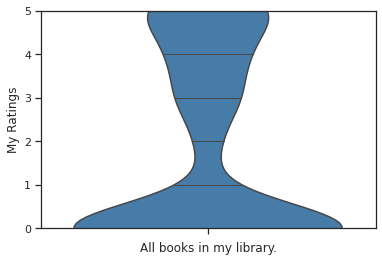

In [ ]:
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

# Apply the theme
sns.set_palette(CB_color_cycle)
sns.set_theme(style="ticks", palette=CB_color_cycle)

# create the plot, with seaborn style
plot = (
    sns.violinplot(y="My Rating", data=raw_goodreads, inner="stick", color='#377eb8')
)
plot.set(xlabel='All books in my library.', ylabel='My Ratings')
plot.set_ylim(0, 5)
plt.show()

Obviously, that's problematic. Let's fix this code so the violin plot excludes zeroes as before:

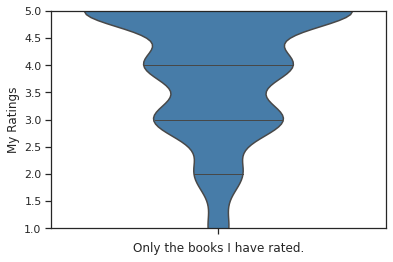

In [ ]:
# store the non-zero version of the data
cleansed_my_ratings = raw_goodreads.loc[raw_goodreads["My Rating"] != 0]
# create the plot, as before
plot = (
    sns.violinplot(y="My Rating", data=cleansed_my_ratings, inner="stick")
)
plot.set(xlabel='Only the books I have rated.', ylabel='My Ratings')
plot.set_ylim(1, 5)
plt.show()

That looks much more sensible. In my data, it shows I am far from a normal distribution in my book reviews: which makes sense, if I enjoy reading I should mostly enjoy books in my opinion!

Now, rather than having to manually clean the data *every time we want to use it*, it's preferable to create a new file with cleansed data. I suggest we:
* Modify the column names, as spaces and such can be irritating when referring to columns, let's stick with the Python snake case.
* Modify the dtypes of the columns and make sure they represent the data well, and make our lives easier when analyzing the data.
* Separate into two bookshelves to represent the following. You can add your own code here to add in other bookshelves, too.
** 'read'
** 'want to read'
* Save the data to new files, so we can use it in the future without having to do all this work again! Rather that save to `.csv`, let's save to a serialized pickle format `.pkl`, which is a binary format that is much faster to read and write to than `.csv`. It's will also save the  changes we made in 2). The only downside is that it can't be used outside of Python, but you can always modify this to save as `.csv` instead, and lose the changes made in 2).

In [ ]:
# 1) modify the column names - creating a new dataframe:
mutable_raw = raw_goodreads.copy()
mutable_raw.dtypes

mutable_raw.columns = ['book_id', 'title', 'author', 'author_surname_to_firstname', 'additional_authors', 'isbn', 'isbn13', 'my_rating', 'average_rating', 'publisher', 'binding', 'number_of_pages', 'year_published', 'original_publication_year', 'date_read', 'date_added', 'bookshelves', 'bookshelves_with_positions', 'exlusive_shelf', 'my_review', 'spoiler', 'private_notes', 'read_count', 'owned_copies', 'read_dates','genres','number_of_ratings']

# uncomment below if you are not using the enhanced CSV as described in Part0
#mutable_raw.columns = ['book_id', 'title', 'author', 'author_surname_to_firstname', 'additional_authors', 'isbn', 'isbn13', 'my_rating', 'average_rating', 'publisher', 'binding', 'number_of_pages', 'year_published', 'original_publication_year', 'date_read', 'date_added', 'bookshelves', 'bookshelves_with_positions', 'exlusive_shelf', 'my_review', 'spoiler', 'private_notes', 'read_count', 'owned_copies']

# 2) modify the dtypes
mutable_raw['date_added'] = pd.to_datetime(mutable_raw['date_added'])
mutable_raw['date_read'] = pd.to_datetime(mutable_raw['date_read'])
mutable_raw['year_published'] = pd.to_numeric(mutable_raw['year_published'], errors='coerce')
mutable_raw['original_publication_year'] = pd.to_numeric(mutable_raw['original_publication_year'], errors='coerce')
mutable_raw['number_of_pages'] = pd.to_numeric(mutable_raw['number_of_pages'], errors='coerce')
mutable_raw['my_rating'] = pd.to_numeric(mutable_raw['my_rating'], errors='coerce')
mutable_raw['average_rating'] = pd.to_numeric(mutable_raw['average_rating'], errors='coerce')
mutable_raw['read_count'] = pd.to_numeric(mutable_raw['read_count'], errors='coerce')
mutable_raw['owned_copies'] = pd.to_numeric(mutable_raw['owned_copies'], errors='coerce')
mutable_raw['book_id'] = pd.to_numeric(mutable_raw['book_id'], errors='coerce')

# 3a) store the 'read' bookshelf
read_bookshelf = mutable_raw.loc[mutable_raw["my_rating"] != 0]

# 3b) store the "to-read" bookshelf
to_read_bookshelf = mutable_raw.loc[mutable_raw["my_rating"] == 0]

# 4) save the data to pickle files.
read_bookshelf.to_pickle('read_bookshelf.pkl')
to_read_bookshelf.to_pickle('to_read_bookshelf.pkl')

# or .csv files, if you prefer
#read_bookshelf.to_csv('data/read_bookshelf.csv', index=False)
#to_read_bookshelf.to_csv('data/to_read_bookshelf.csv', index=False)

# let's check that these look sensible now:
mutable_raw.dtypes

book_id                                 int64
title                                  object
author                                 object
author_surname_to_firstname            object
additional_authors                     object
isbn                                   object
isbn13                                 object
my_rating                               int64
average_rating                        float64
publisher                              object
binding                                object
number_of_pages                       float64
year_published                        float64
original_publication_year             float64
date_read                      datetime64[ns]
date_added                     datetime64[ns]
bookshelves                            object
bookshelves_with_positions             object
exlusive_shelf                         object
my_review                              object
spoiler                                object
private_notes                     

# My Results vs Average Results

Next, let's compare how different our personal ratings are against the community's ratings.

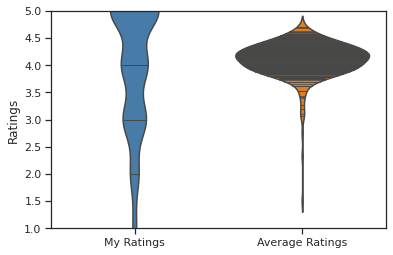

In [ ]:
# Select two columns of interest and create a new dataframe
ratings_comparison = read_bookshelf.loc[:, ['my_rating', 'average_rating']]

# Create the violin plot to compare the two ratings
ratings_plot = sns.violinplot(data=ratings_comparison, inner="stick")

# Set the x and y labels and the range for the y-axis
ratings_plot.set(xlabel='', ylabel='Ratings')
ratings_plot.set_xticklabels([f"My Ratings", f"Average Ratings"])
ratings_plot.set_ylim(1, 5)

# Show the plot
plt.show()

We can always just make use of the describe method, of course:

In [ ]:
ratings_comparison.describe()

,my_rating,average_rating
count,361.000000,361.000000
mean,3.975069,4.103518
std,1.123951,0.322540
min,1.000000,1.500000
25%,3.000000,3.950000
50%,4.000000,4.140000
75%,5.000000,4.300000
max,5.000000,4.710000


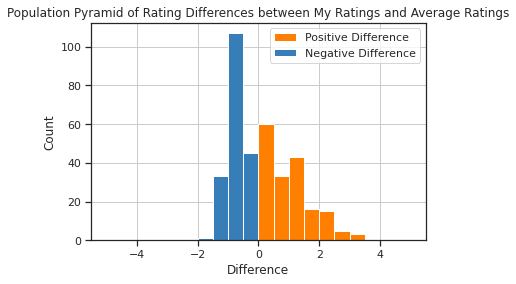

In [ ]:
# Calculate the difference between 'my_rating' and 'average_rating' and add it as a new column
comparison_data = read_bookshelf[['my_rating', 'average_rating']]
comparison_data = comparison_data.assign(difference = comparison_data['average_rating'] - comparison_data['my_rating'])

# Copy the positive and negative differences into separate variables for plotting
positive_differences = comparison_data[comparison_data['difference'] > 0]['difference']
negative_differences = comparison_data[comparison_data['difference'] < 0]['difference']

# Define the bins for the histogram
bins = [x * 0.1 for x in range(-50, 55, 5)]

# Plot the histogram 
ax = positive_differences.hist(bins=bins, color='#ff7f00', histtype='bar', stacked=True, label='Positive Difference')
negative_differences.hist(bins=bins, color='#377eb8', histtype='bar', stacked=True, ax=ax, label='Negative Difference')
plt.xlabel('Difference')
plt.ylabel('Count')
plt.legend()
plt.title('Population Pyramid of Rating Differences between My Ratings and Average Ratings')
plt.show()


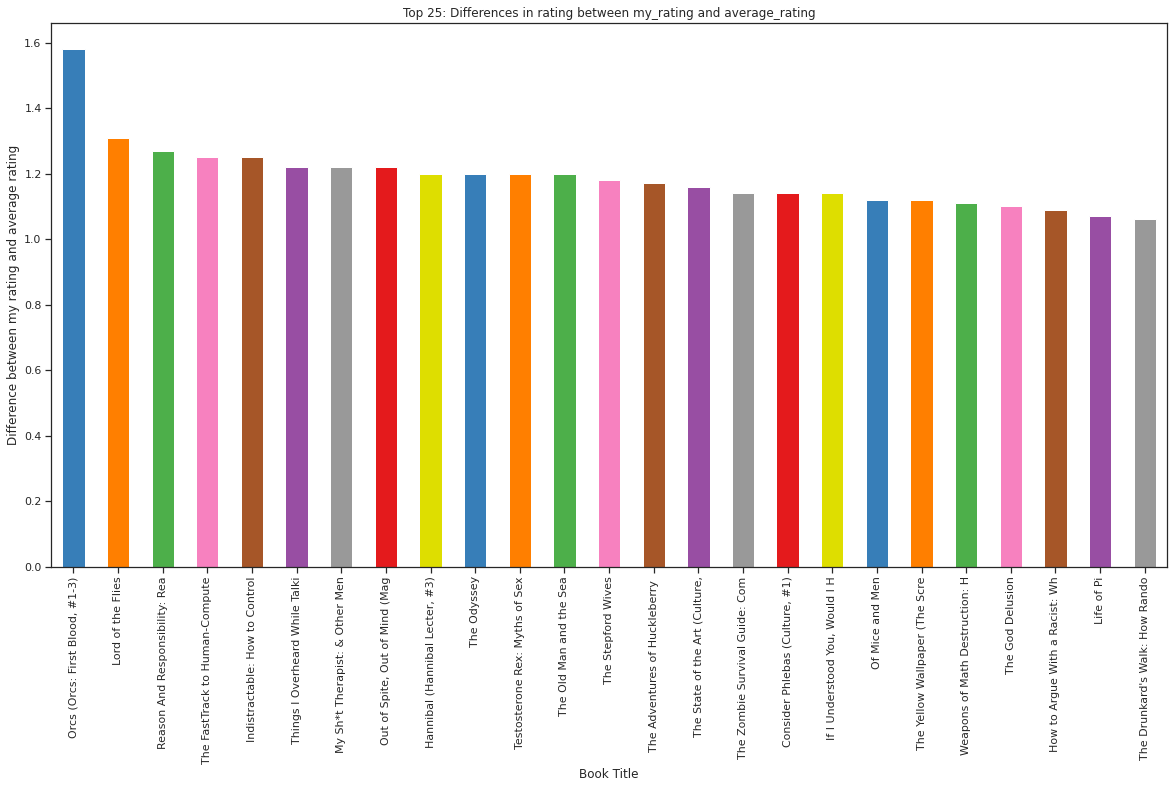

In [ ]:
# Create a new dataframe to store the difference calculation
difference_data = read_bookshelf[['title', 'my_rating', 'average_rating']].copy()
difference_data['difference'] = difference_data['my_rating'] - difference_data['average_rating']

#Sort the difference_data dataframe in descending order
difference_data = difference_data.sort_values(by='difference', ascending=False)

#Plot the top 25 differences
top_25 = difference_data.head(25)
# titles get lengthy, plot becomes massive. This sets a maximum of 30 characters per title:
top_25 = top_25.assign(title = top_25['title'].apply(lambda x: x[:30]))
top_25.plot(kind='bar', x='title', y='difference', figsize=(20,10), color=CB_color_cycle, legend=False)
plt.xlabel('Book Title')
plt.ylabel('Difference between my rating and average rating')
plt.title('Top 25: Differences in rating between my_rating and average_rating')
plt.xticks(rotation=90)
plt.show()

# Reviewed vs Not Reviewed
It's also nice to see how many books you've reviewed vs those you've just rated:

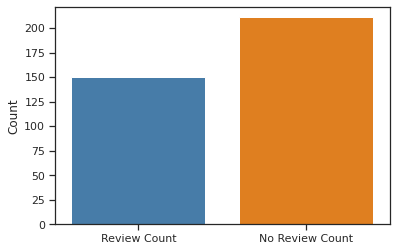

In [ ]:
# Count number of read books with no review and with review
no_review_count = read_bookshelf["my_review"].isna().sum()
review_count = read_bookshelf["my_review"].notna().sum()

# Combine into a DataFrame for ease of plotting
review_vs_not_reviewed_df = pd.DataFrame({'Count': [review_count, no_review_count],
                                          'Name': ['Review Count', 'No Review Count']})

# Create the bar plot
review_vs_no_review_count_plot = sns.barplot(x='Name', y='Count', data=review_vs_not_reviewed_df)

# Set labels
review_vs_no_review_count_plot.set(xlabel='', ylabel='Count')

# Show the plot
plt.show()

# Page Count

Let's make some 'buckets' or 'bins' to represent similar lengths of books you've read, and plot that. We could also do this for books you want to read, by changing the data source.

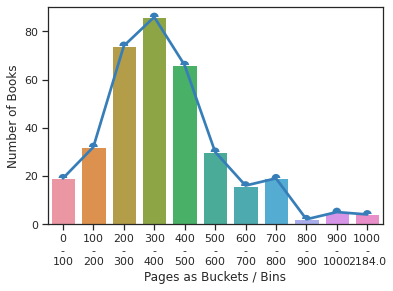

In [ ]:
# create bins for the number of pages
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, read_bookshelf["number_of_pages"].max()]

# create labels for the bins
bin_labels = [f"{min_val}\n-\n{max_val}" for min_val, max_val in zip(bins, bins[1:])]

# create a new object with the binned data
book_pages_bins = pd.cut(read_bookshelf["number_of_pages"], bins, labels=bin_labels)

# chain a few commands to create a new dataframe with the binned data
book_pages_df = (book_pages_bins.value_counts()
                 .rename("Count")
                 .reset_index()
                 .rename(columns={"index":"Page_Range"}))

# create the bar and line plot
plot = sns.barplot(x='Page_Range', y='Count', data=book_pages_df)
plot = sns.pointplot(x='Page_Range', y='Count', data=book_pages_df)

# plot
plot.set(xlabel='Pages as Buckets / Bins', ylabel='Number of Books')
plt.show()

## Rating vs Page Count

Does the time investment effect your rating? Let's find out!

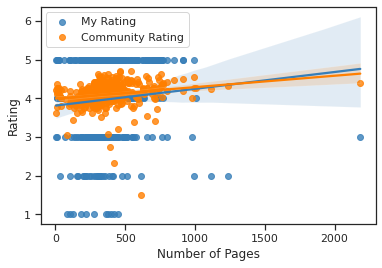

In [ ]:
# Create a figure and subplots
fig, ax = plt.subplots(nrows=1, ncols=1)

# regression line of my_rating vs number_of_pages
sns.regplot(x="number_of_pages", y="my_rating", data=read_bookshelf, ax=ax, label='My Rating')

# regression line of average_rating vs number_of_pages
sns.regplot(x="number_of_pages", y="average_rating", data=read_bookshelf, ax=ax, label='Community Rating')

# plot
ax.set(xlabel='Number of Pages', ylabel='Rating')
plt.legend(loc='upper left')
plt.show()

## Cumulative Page & Book Count Over Time

Taking inspiration from [this](https://bgstieber.github.io/post/my-year-in-books-goodreads-data-analysis-in-r/) article, let's recreate the year-long progress R plot in seaborn:



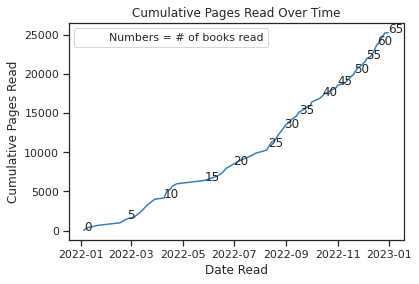

In [ ]:
# Specify the date range to be plotted or comment out to use all data
dates = ['2022-01-01', '2022-12-31']
# dates = ''

# Set the interval for displaying cumulative books read
mod_books_parameter = 5

# Get the data and remove missing values
summary_by_date = read_bookshelf[["date_read", "title", "number_of_pages"]].dropna()

# Filter the data based on the specified date range
if dates != '':
    summary_by_date = summary_by_date[(summary_by_date['date_read'] >= dates[0]) & (summary_by_date['date_read'] <= dates[1])]

# Sort the data by date
summary_by_date = summary_by_date.sort_values("date_read")

# Add a column for cumulative pages read
summary_by_date["cumu_pages_read"] = summary_by_date["number_of_pages"].fillna(0).cumsum()

# Add a column for cumulative books read
summary_by_date["cumu_books_read"] = range(0, len(summary_by_date))

# Plot the cumulative pages read over time
plot = sns.lineplot(x="date_read", y="cumu_pages_read", data=summary_by_date)

# Add the cumulative books read at the specified interval
for i, row in summary_by_date.iterrows():
    if row["cumu_books_read"] % mod_books_parameter == 0:
        plt.text(row["date_read"], row["cumu_pages_read"], row["cumu_books_read"])

# Add labels to the plot
plot.set(xlabel='Date Read', ylabel='Cumulative Pages Read', title='Cumulative Pages Read Over Time')

# Add a legend to explain the numbers
custom_legend = plt.Rectangle((0,0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([custom_legend], ["Numbers = # of books read"], loc='upper left')

# Display the plot
plt.show()


Let's do it again, but show multiple years:

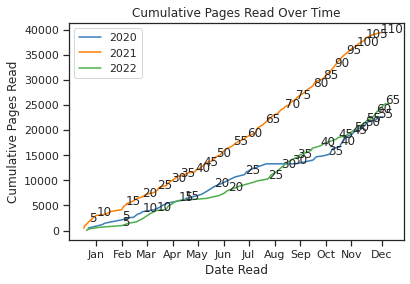

In [ ]:
# choose dates for plot or uncomment other line to use all data
dates = ['2020-01-01', '2022-12-31']
#dates = ''

# set parameter to show cumulative number of books read by modulus:
mod_books_parameter = 5

# get appropriate data
summary_by_date = read_bookshelf.loc[:, ["date_read", "title", "number_of_pages"]].dropna()

# only include dates asked for
if dates != '':
    summary_by_date = summary_by_date[(summary_by_date['date_read'] >= dates[0]) & (summary_by_date['date_read'] <= dates[1])]

# sort by date
summary_by_date = summary_by_date.sort_values("date_read")

# Create a column for cumu_pages_read
summary_by_date['cumu_pages_read'] = summary_by_date["number_of_pages"].fillna(0).cumsum()

# Create a column for cumu_books_read
summary_by_date = summary_by_date.assign(cumu_books_read=range(1, len(summary_by_date) + 1))

# Get a list of unique years
years = summary_by_date['date_read'].dt.year.unique()

# plot
for i, year in enumerate(years):
    # Get the data for the current year
    year_data = summary_by_date[summary_by_date['date_read'].dt.year == year].copy()

    # for plotting, separate the year from month / day.
    year_data['year'] = year_data['date_read'].dt.year
    year_data['month_day'] = year_data['date_read'].dt.strftime('%m-%d')

    # remove unnecessary date read column
    year_data.drop(columns=["date_read"], inplace=True)

    # change the month_day column to day index
    year_data['month_day'] = pd.to_datetime(year_data['month_day'], format='%m-%d').dt.dayofyear

    # Create new columns for cumulative pages and books read
    year_data['cumu_pages_read'] = year_data["number_of_pages"].cumsum()
    year_data['cumu_books_read'] = range(1, len(year_data) + 1)
    sns.lineplot(x="month_day", y="cumu_pages_read", data=year_data, label=year)

    # add text showing cumulative number of books read
    for i, row in year_data.iterrows():
        if row['cumu_books_read'] % mod_books_parameter == 0:
            plt.text(row['month_day'], row['cumu_pages_read'] + 10, row['cumu_books_read'])

# since the dates are fixed into a 1 year span, let's clean up the xticks a little.
# these numbers are approximately halfway between the start and end of months
month_starts = [16,47,76,107,137,168,198,229,260,290,321,357]
month_names = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']
plt.xticks(month_starts, month_names)
plt.xlabel("Date Read")
plt.ylabel("Cumulative Pages Read")
plt.title("Cumulative Pages Read Over Time")
plt.legend()

#Show plot
plt.show()

# Review length vs rating

Perhaps the length of your reviews provides insight into your ratings of a book?

R squared:  0.0034320795219650035


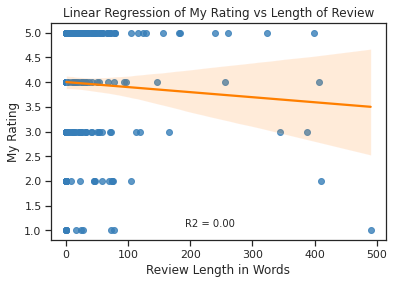

In [ ]:
from sklearn.metrics import r2_score
import numpy as np
from sklearn.linear_model import LinearRegression

# Take a copy of the read bookshelf data to keep the raw data as named
review_length_vs_rating_df = read_bookshelf.copy()

# Change the data type of "my_review" column to string
review_length_vs_rating_df["my_review"] = review_length_vs_rating_df["my_review"].astype(str)

# Get the X and Y values for linear regression
X = review_length_vs_rating_df['my_review'].apply(lambda x: len(x.split())).values.reshape(-1, 1)
Y = review_length_vs_rating_df["my_rating"].values

# Fit the linear regression model
model = LinearRegression().fit(X, Y)

# Predict the values of Y based on the X values
Y_pred = model.predict(X)

# Calculate the R squared value
r2 = r2_score(Y, Y_pred)

# Print the R squared value
print("R squared: ", r2)

# Plot linear regression using seaborn's regplot function
sns.regplot(
    # X-axis: apply lambda function to get word count of each review
    x=review_length_vs_rating_df['my_review'].apply(lambda x: len(x.split())),
    # Y-axis: "my_rating" column
    y=review_length_vs_rating_df["my_rating"],
    # Data source
    data=review_length_vs_rating_df,
    # Scatter plot properties
    scatter_kws={"color": CB_color_cycle[0]},
    # Line plot properties
    line_kws={"color": CB_color_cycle[1]}
)

# Labels and title for the plot
plt.xlabel("Review Length in Words")
plt.ylabel("My Rating")
plt.title("Linear Regression of My Rating vs Length of Review")
# Add the R2 score to the middle bottom of the plot
plt.text(0.4, 0.1, 'R2 = {:.2f}'.format(r2), transform=plt.gca().transAxes, fontsize=10, va='top', ha='left')
plt.show()


It seems I have a slight negative correlation but the R^2 indicates this isn't at all trustworthy. No surprise, there is not much data to work from

## Review length vs rating - Polynomial Regression
This really showed that there is no obvious correlation. Playing with the n number can make it kind of fit but I don't give it much faith. Let's compare both linear & polynomial here:

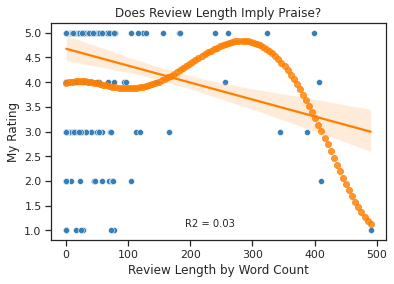

In [ ]:
# This is about to get VERY scientific and mathematical....
# how squiggly do you want the line? higher = more squiggly
polynomial_degree = 5

# Fit a n degree polynomial function
coefs = np.polyfit(review_length_vs_rating_df['my_review'].apply(lambda x: len(x.split())), review_length_vs_rating_df["my_rating"].astype(int), polynomial_degree)

# calculate the polynomial
poly_func = np.poly1d(coefs)

# calculate x vals
x_values = np.linspace(review_length_vs_rating_df['my_review'].apply(lambda x: len(x.split())).min(), review_length_vs_rating_df['my_review'].apply(lambda x: len(x.split())).max(), 100)

# calculate y vals
y_values = poly_func(x_values)

# Calculate the R2 score
r2 = r2_score(review_length_vs_rating_df["my_rating"].astype(int), poly_func(review_length_vs_rating_df['my_review'].apply(lambda x: len(x.split()))))

# scatter plot
sns.scatterplot(x=review_length_vs_rating_df['my_review'].apply(lambda x: len(x.split())), y=review_length_vs_rating_df["my_rating"].astype(int), data=review_length_vs_rating_df)

# add the lines
sns.regplot(x=x_values, y=y_values, color=CB_color_cycle[1])
plt.xlabel("Review Length by Word Count")
plt.ylabel("My Rating")
plt.title("Does Review Length Imply Praise?")
# Add the R2 score to the middle bottom of the plot
plt.text(0.4, 0.1, 'R2 = {:.2f}'.format(r2), transform=plt.gca().transAxes, fontsize=10, va='top', ha='left')
plt.show()

I wouldn't read into either of these plots too much for my data. There's not a strong correlation between review length and ratings, for me.

# Predicted Read Time

We have a lot of information in the `to_read_bookshelf.pkl` file, but we haven't used it. Let's try and estimate - based on how long it took us to read the books we have read - how long it will take us to read the books we have yet to read.

Spoiler alert: it's not accurate, at least with my data. This is an exercise in using the tools we have learned so far, not in predicting how long it will take us to read a book.

## CNN to predict read time

Regression would probably work fine, but let's try a different approach. Let's make use of another supervised learning algorithm: convolutional neural network. We'll use the `read_bookshelf.pkl` file to train the network on how long it took us to read a book, and then use the `to_read_bookshelf.pkl` file to predict how long it will take us to read the books we have yet to read.

Epoch 1/10
5/5 [==============================] - 1s 65ms/step - loss: 46789.2031 - val_loss: 79480.7812
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 46694.6641 - val_loss: 79394.5547
Epoch 3/10
5/5 [==============================] - 0s 11ms/step - loss: 46626.1641 - val_loss: 79320.4375
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 46564.3242 - val_loss: 79246.0547
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 46501.5391 - val_loss: 79167.3047
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 46422.5234 - val_loss: 79026.9766
Epoch 7/10
5/5 [==============================] - 0s 15ms/step - loss: 46282.8477 - val_loss: 78849.1328
Epoch 8/10
5/5 [==============================] - 0s 11ms/step - loss: 46166.5117 - val_loss: 78729.2969
Epoch 9/10
5/5 [==============================] - 0s 10ms/step - loss: 46055.8086 - val_loss: 78597.7266
Epoch 10/10
13/13 [==============================] - 0s

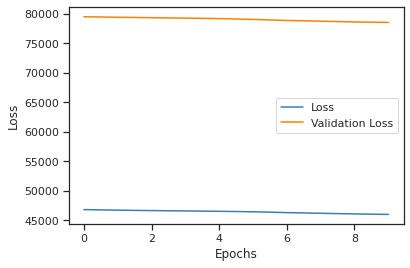

In [ ]:
from keras.layers import SimpleRNN, Dense
from keras import Sequential
from sklearn.model_selection import train_test_split

# Specify the date range to be considered
dates = ['2020-01-01', '2022-12-31']

#Remove the rows with missing values from the two dataframes
to_read_bookshelf_cnn = to_read_bookshelf.dropna(subset=['number_of_pages'])
read_bookshelf_cnn = read_bookshelf.dropna(subset=['date_read'])
read_bookshelf_cnn = read_bookshelf.dropna(subset=['number_of_pages'])

# Filter the data based on the specified date range
if dates != '':
    read_bookshelf_cnn = read_bookshelf_cnn[(read_bookshelf_cnn['date_read'] >= dates[0]) & (read_bookshelf_cnn['date_read'] <= dates[1])]
    read_bookshelf_cnn = read_bookshelf_cnn[(read_bookshelf_cnn['date_added'] >= dates[0]) & (read_bookshelf_cnn['date_added'] <= dates[1])]

#Calculate the elapsed time in seconds between date_read and date_added for each book in read_bookshelf
y = (read_bookshelf_cnn['date_read'] - read_bookshelf_cnn['date_added']).dt.total_seconds() / (24 * 3600)

#Get the number of pages for each book in read_bookshelf as the input features
X = read_bookshelf_cnn['number_of_pages'].values

#Filter out any rows with elapsed time 0 or less
read_bookshelf_cnn = read_bookshelf_cnn[y > 0]
X = X[y > 0]
y = y[y > 0]

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Reshape the input features to be 3D for the RNN
X_train = np.array(X_train).reshape((-1, 1, 1))
X_test = np.array(X_test).reshape((-1, 1, 1))

#Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model on the training data.
# number of epochs is up to you, I just put 10 since this is an example more than anything useful!
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

#Predict the elapsed time for the books in the to_read_bookshelf
to_read_X = to_read_bookshelf_cnn['number_of_pages'].values
to_read_X = np.array(to_read_X).reshape((-1, 1, 1))
to_read_y_pred = model.predict(to_read_X)
to_read_y_pred = to_read_y_pred.reshape(-1)

#Create a new pandas dataframe called "results"
results = pd.DataFrame({'Estimated Read Time': to_read_y_pred, 'Title': to_read_bookshelf_cnn['title'], 'Page Count': to_read_bookshelf_cnn['number_of_pages']})

#Reset the index of the results dataframe
results.reset_index(drop=True, inplace=True)

#Plot the loss and validation loss over the epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

2/2 [==============================] - 0s 6ms/step
R2: -0.37


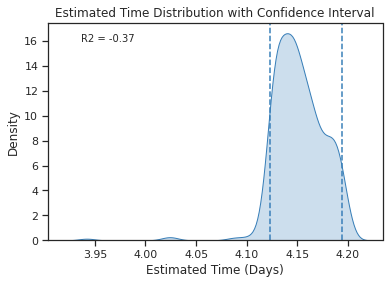

In [ ]:
# calculate r2
r2 = r2_score(y_test, model.predict(X_test))
print("R2: {:.2f}".format(r2))

#Plot the estimated times using seaborn
sns.kdeplot(to_read_y_pred, fill=True)
plt.xlabel('Estimated Time (Days)')
plt.ylabel('Density')
plt.title('Estimated Time Distribution with Confidence Interval')

#Calculate the lower and upper bounds of the 95% confidence interval
lower, upper = np.percentile(to_read_y_pred, [2.5, 97.5])

#Plot the lower and upper bounds
plt.axvline(x=lower, linestyle='--')
plt.axvline(x=upper, linestyle='--')

# Add the R2 score to the top left corner of the plot
plt.text(0.1, 0.95, 'R2 = {:.2f}'.format(r2), transform=plt.gca().transAxes, fontsize=10, va='top', ha='left')

plt.show()

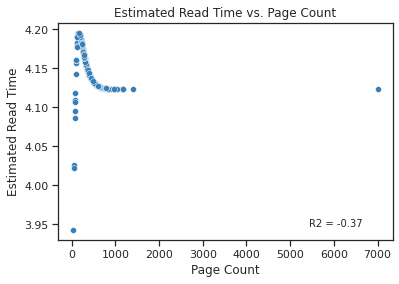

In [ ]:
#Plot a scatterplot of the Estimated Read Time and Page Count columns in the results dataframe
sns.scatterplot(x='Page Count', y='Estimated Read Time', data=results)

#Add a title to the plot
plt.title("Estimated Read Time vs. Page Count")

# Add the R2 score to the bottom right corner of the plot
plt.text(0.75, 0.1, 'R2 = {:.2f}'.format(r2), transform=plt.gca().transAxes, fontsize=10, va='top', ha='left')

#Show the plot
plt.show()

## Linear Regression

At least with my data, the RNN model didn't perform as well as I would have liked. I would argue this is due to the "Date Added" being when a book is added to *any* bookshelf, not when I started reading, so some books are being flagged as taking years to read instead of the likely weeks. Let's try our tried and trusted approach: regression. We'll use the `read_bookshelf.pkl` file to train the model on how long it took us to read a book, and then use the `to_read_bookshelf.pkl` file to predict how long it will take us to read the books we have yet to read.

R2 score on the test set: -0.006798747345102107


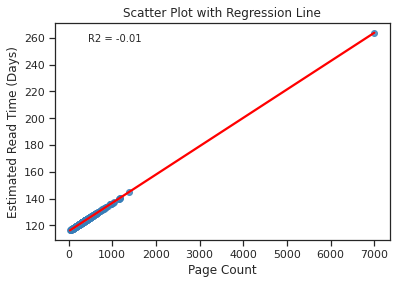

In [ ]:
# Specify the date range to be considered
dates = ['2020-01-01', '2022-12-31']

# Remove the rows with missing values and filter based on date range
read_bookshelf_filtered = read_bookshelf.dropna(subset=['date_read', 'number_of_pages'])
to_read_bookshelf_filtered = to_read_bookshelf.dropna(subset=['number_of_pages'])

if dates != '':
    read_bookshelf_filtered = read_bookshelf_filtered[(read_bookshelf_filtered['date_read'] >= dates[0]) & (read_bookshelf_filtered['date_read'] <= dates[1]) & (read_bookshelf_filtered['date_added'] >= dates[0]) & (read_bookshelf_filtered['date_added'] <= dates[1])]

# Calculate elapsed time between date_read and date_added, and get number of pages as input features
y = (read_bookshelf_filtered['date_read'] - read_bookshelf_filtered['date_added']).dt.total_seconds() / (24 * 3600)
X = read_bookshelf_filtered['number_of_pages'].values

# Remove rows with elapsed time 0 or less
read_bookshelf_filtered = read_bookshelf_filtered[y > 0]
X = X[y > 0].reshape(-1, 1)
y = y[y > 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the linear regression model
model = LinearRegression().fit(X_train, y_train)

# Use the trained model to make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate the R2 score on the test set
r2 = r2_score(y_test, y_test_pred)
print("R2 score on the test set:", r2)

# Use the trained model to make predictions on the to_read bookshelf
to_read_y_pred = model.predict(to_read_bookshelf_filtered['number_of_pages'].values.reshape(-1, 1))

# Create a new dataframe with the estimated read time, book title, and page count
linear_results = pd.DataFrame({'title':to_read_bookshelf_filtered['title'], 'estimated_read_time':to_read_y_pred, 'page_count':to_read_bookshelf_filtered['number_of_pages']})

# Plot the scatter plot with regression line
sns.regplot(x='page_count', y='estimated_read_time', data=linear_results, scatter=True, order=2, line_kws={'color': 'red'})
plt.xlabel('Page Count')
plt.ylabel('Estimated Read Time (Days)')
plt.title('Scatter Plot with Regression Line')

# Add the R2 score to the top left corner of the plot
plt.text(0.1, 0.95, 'R2 = {:.2f}'.format(r2), transform=plt.gca().transAxes, fontsize=10, va='top', ha='left')
plt.show()


## Conclusion
Yep, still terrible. Regardless of the method, you need good data to get good results. I suggest you try this out with your own data and see how it goes, if you add books to your goodreads only when you begin reading your results should be better.

# Books Finished by Weekday

Let's play around with plotly, to make a interactive pie chart.

In [ ]:
import plotly.express as px

# Copy the dataframe to modify it without affecting the original
df = read_bookshelf.copy()

# Remove rows with missing 'date_read' values
df.dropna(subset=['date_read'], inplace=True)

# Add a column for day of week
df['weekday'] = df['date_read'].dt.day_name()

# Count number of books read each day of the week
weekday_count = df['weekday'].value_counts().to_dict()

# Order the days of the week in chronological order
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sorted_weekday_count = {weekday: weekday_count[weekday] for weekday in weekdays if weekday in weekday_count}

# Create a dataframe from sorted_weekday_count
df = pd.DataFrame({'Day of Week': list(sorted_weekday_count.keys()), 'Number of Books': list(sorted_weekday_count.values())})

# Plot the sunburst chart
fig = px.sunburst(df, path=['Day of Week'], values='Number of Books', title='Books Read by Day of Week')

# Update layout to remove the legend, we don't need to be told about the day of week twice.
fig.update_layout(showlegend=False,
                  hoverlabel=dict(font=dict(size=12), align='left', bgcolor='white'),
                  margin=dict(t=50, l=0, r=0, b=0))

fig.update_traces(hovertemplate='Number of books: %{value}',
                  marker=dict(line=dict(width=2, color='DarkSlateGrey')))

fig.show()


# Word Frequency of Book Titles

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


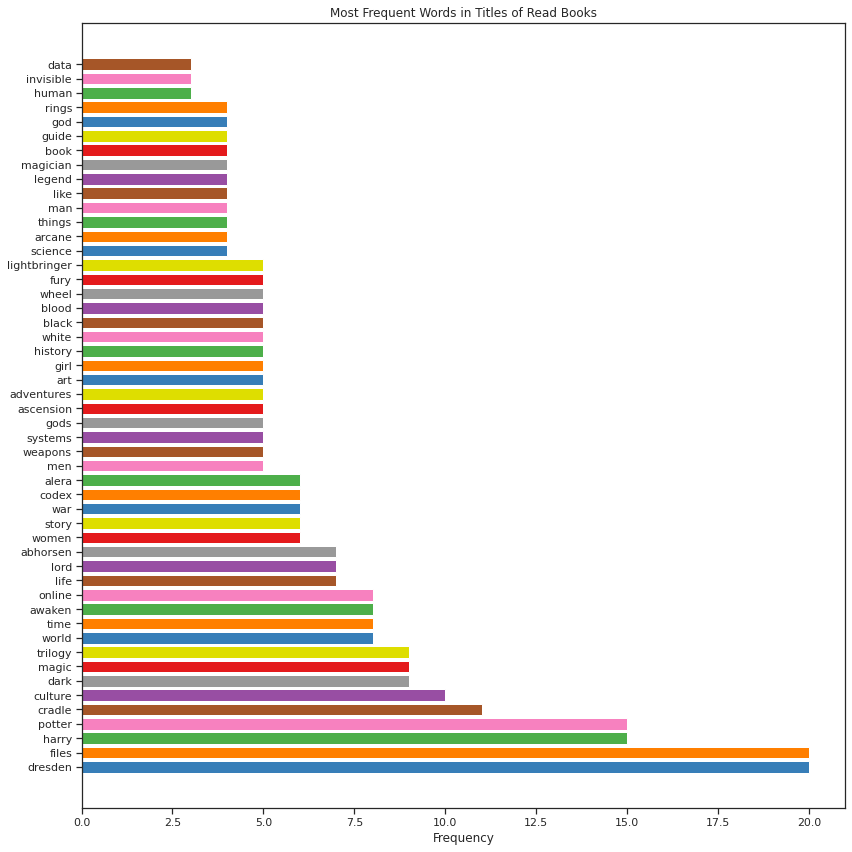

In [ ]:
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

# download word database 
nltk.download('stopwords')
nltk.download("punkt")

# Get all titles
titles = " ".join(review for review in read_bookshelf['title'])

# Remove stopwords
stopwords = set(stopwords.words("english"))
stopwords.update(['the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on', 'that', 'this', 'at', 'an', 'by', 'be', 'as'])

# Remove stopwords from the titles
filtered_titles = " ".join([word for word in titles.lower().split() if word not in stopwords])

# Remove special symbols and numbers
filtered_titles = ''.join(e for e in filtered_titles if (e.isalnum() or e.isspace()))
word_tokens = word_tokenize(filtered_titles)
word_tokens = [word for word in word_tokens if not word.isdigit()]

# Count the frequency of each word
word_counts = Counter([word for word in word_tokens if word not in stopwords])

# Plot the word cloud
words = [word for word, count in word_counts.most_common(50)]
counts = [count for word, count in word_counts.most_common(50)]

plt.figure(figsize=(12,12))
plt.barh(words, counts, color=CB_color_cycle)
plt.xlabel("Frequency")
plt.title("Most Frequent Words in Titles of Read Books")

plt.tight_layout()
plt.show()


## Now as a word cloud!

Less informative, but pretty.

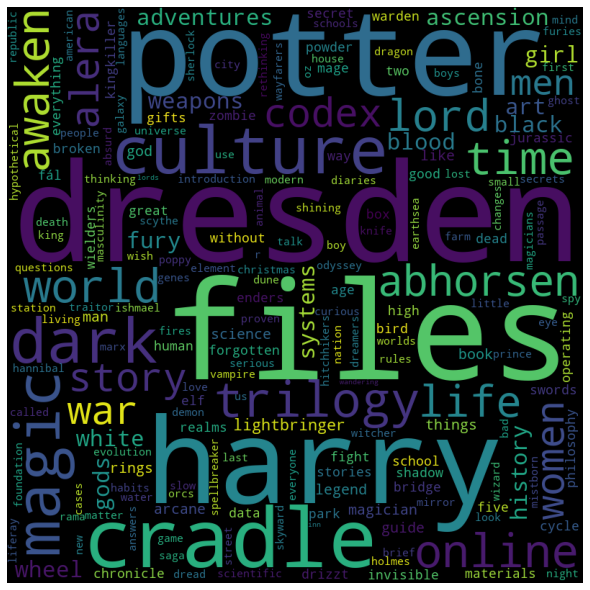

In [ ]:
from wordcloud import WordCloud

# Plot the word cloud
wordcloud = WordCloud(width=800, height=800,
                      background_color='black',
                      stopwords=stopwords,
                      min_font_size=10).generate_from_frequencies(word_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Male vs Female Authors

This is making use of existing resources. I am not claiming anything regarding gender identities, this is a hand wave-y analysis of the data available.

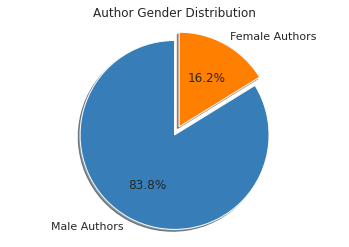

In [ ]:
try:
    from names_dataset import NameDataset, NameWrapper
except ModuleNotFoundError:
    !pip install names_dataset
    from names_dataset import NameDataset, NameWrapper

# Load the names database
nd = NameDataset()

# Create a new column "gender" in the dataframe
read_bookshelf_gender = read_bookshelf.copy()
read_bookshelf_gender['gender'] = read_bookshelf['author'].apply(lambda x: NameWrapper(nd.search(x.split()[0])).gender if x.split()[0].isalpha() else np.nan)

# Count the number of male and female authors
male_authors = read_bookshelf_gender[read_bookshelf_gender['gender'] == 'Male'].shape[0]
female_authors = read_bookshelf_gender[read_bookshelf_gender['gender'] == 'Female'].shape[0]

# Plot the pie chart of male and female authors
labels = ['Male Authors', 'Female Authors']
sizes = [male_authors, female_authors]
explode = (0.1, 0)  # only "explode" the 1st slice

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)     

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Author Gender Distribution')
plt.show()


## Male vs Female Authors by Recent Years

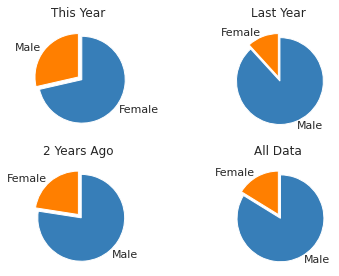

In [ ]:
if nd is None:
    nd = NameDataset()

# Get the current year, last year and 2 years ago
CURRENT_YEAR = pd.Timestamp('now').year
LAST_YEAR = CURRENT_YEAR - 1
TWO_YEARS_AGO = CURRENT_YEAR - 2

# Split the data based on the date when books were read
current_year_books = read_bookshelf[read_bookshelf['date_read'].dt.year == CURRENT_YEAR]
last_year_books = read_bookshelf[read_bookshelf['date_read'].dt.year == LAST_YEAR]
two_years_ago_books = read_bookshelf[read_bookshelf['date_read'].dt.year == TWO_YEARS_AGO]

# Create a function to get the gender of authors
# please note: this ignores the possibility of multiple authors
# and also ignores initials (e.g. J.R.R. Tolkien)
def get_gender(author):
    first_name = author.split(" ")[0]
    name = NameWrapper(nd.search(first_name)).describe
    if name is None:
        return "Unknown"
    else:
        return name.split(", ")[0]


# Get the gender of authors in the current year
current_year_genders = current_year_books['author'].apply(get_gender)
current_year_genders = current_year_genders[current_year_genders != ""]

# Get the gender of authors in the last year
last_year_genders = last_year_books['author'].apply(get_gender)
last_year_genders = last_year_genders[last_year_genders != ""]

# Get the gender of authors in two years ago
two_years_ago_genders = two_years_ago_books['author'].apply(get_gender)
two_years_ago_genders = two_years_ago_genders[two_years_ago_genders != ""]

# Get the gender of all authors
all_genders = read_bookshelf['author'].apply(get_gender)
all_genders = all_genders[all_genders != ""]

# Create a function to plot the pie charts
def plot_pie_chart(data, title, ax):
    values = data.value_counts()
    labels = values.index
    explode = (0.1, 0)  # only "explode" the 1st slice
    ax.pie(values, labels=labels, startangle=90, counterclock=False, explode=explode)
    ax.set_title(title)
    return ax


# Create a subplot with 4 pie charts
fig, ax = plt.subplots(2, 2)
ax[0,0] = plot_pie_chart(current_year_genders, "This Year", ax[0,0])
ax[0,1] = plot_pie_chart(last_year_genders, "Last Year", ax[0,1])
ax[1,0] = plot_pie_chart(two_years_ago_genders, "2 Years Ago", ax[1,0])
ax[1,1] = plot_pie_chart(all_genders, "All Data", ax[1,1])

plt.tight_layout()

# Books Over Time

## Books read by month (with error bars)

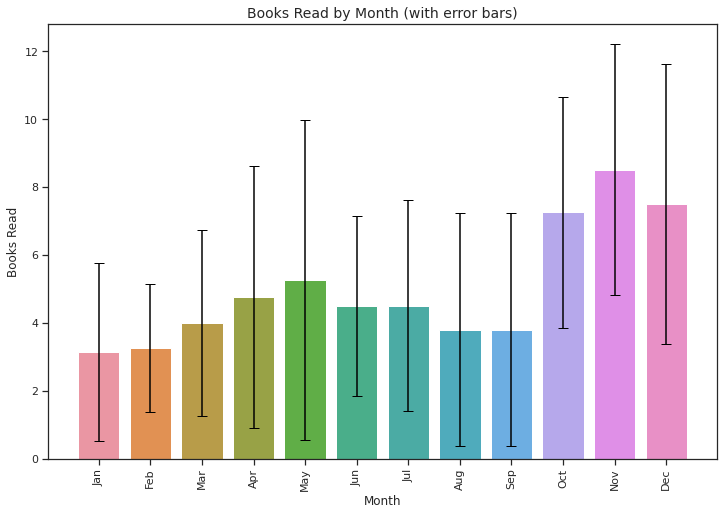

In [ ]:
# Remove entries that have NaT for date_read.
read_bookshelf_over_time = read_bookshelf.copy()
read_bookshelf_over_time = read_bookshelf_over_time.dropna(subset=['date_read'])

# Add a column for year
read_bookshelf_over_time['year'] = read_bookshelf_over_time['date_read'].dt.year

# Get the count of books read each month, by year
books_read_per_month_year = read_bookshelf_over_time.groupby([read_bookshelf_over_time['date_read'].dt.month, read_bookshelf_over_time['year']]).size().reset_index(name='count')

# Get the mean and standard deviation of books read each month
mean_books_read_per_month = books_read_per_month_year.groupby(books_read_per_month_year['date_read']).mean()['count']
std_books_read_per_month = books_read_per_month_year.groupby(books_read_per_month_year['date_read']).std()['count']

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_books_read_per_month.index, y=mean_books_read_per_month.values)
plt.errorbar(x=mean_books_read_per_month.index-1, y=mean_books_read_per_month.values, yerr=std_books_read_per_month.values, fmt='none', color='k', capsize=5)

# Add labels and format the plot
plt.xlabel('Month', fontsize=12)
plt.ylabel('Books Read', fontsize=12)
plt.xticks(np.arange(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=90)
plt.title('Books Read by Month (with error bars)', fontsize=14)
plt.show()

## Books read by week (with error bars)

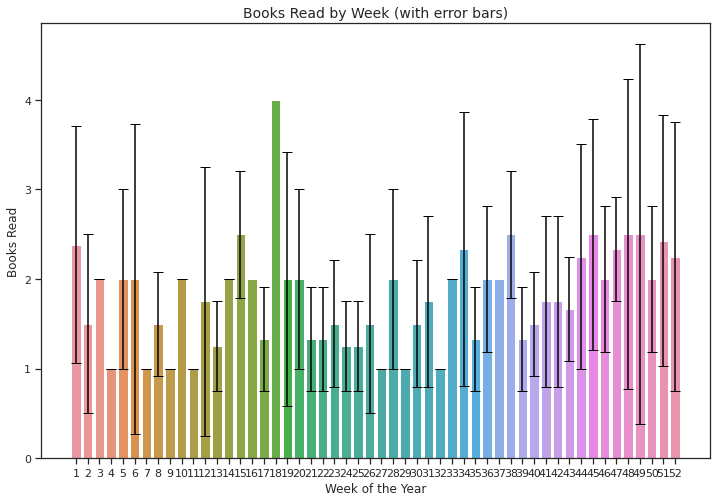

In [ ]:
# Remove entries that have NaT for date_read.
read_bookshelf_over_time = read_bookshelf.copy()
read_bookshelf_over_time = read_bookshelf_over_time.dropna(subset=['date_read'])

# Add a column for week number and year
read_bookshelf_over_time['week_number'] = read_bookshelf_over_time['date_read'].dt.isocalendar().week
read_bookshelf_over_time['year'] = read_bookshelf_over_time['date_read'].dt.year

# Get the count of books read each week, by year
books_read_per_week_year = read_bookshelf_over_time.groupby([read_bookshelf_over_time['week_number'], read_bookshelf_over_time['year']]).size().reset_index(name='count')

# Get the mean and standard deviation of books read each week
mean_books_read_per_week = books_read_per_week_year.groupby(books_read_per_week_year['week_number']).mean()['count']
std_books_read_per_week = books_read_per_week_year.groupby(books_read_per_week_year['week_number']).std()['count']

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_books_read_per_week.index, y=mean_books_read_per_week.values)

# Add error bars
x_pos = np.arange(len(mean_books_read_per_week))
plt.errorbar(x_pos, mean_books_read_per_week, yerr=std_books_read_per_week, fmt='none', color='k', capsize=5)

# Add labels and format the plot
plt.xlabel('Week of the Year', fontsize=12)
plt.ylabel('Books Read', fontsize=12)
plt.xticks(x_pos, np.arange(1, 53))
plt.title('Books Read by Week (with error bars)', fontsize=14)
plt.show()


## Books read by day (with error bars)

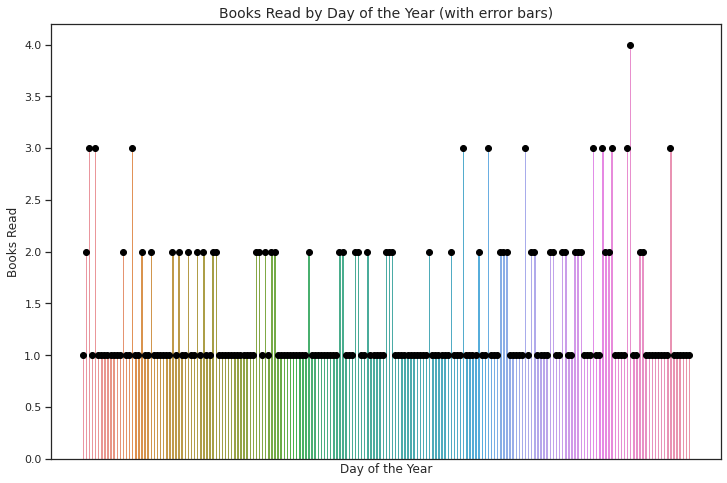

In [ ]:
# Remove entries that have NaT for date_read.
read_bookshelf_over_time = read_bookshelf.copy()
read_bookshelf_over_time = read_bookshelf_over_time.dropna(subset=['date_read'])

# Add a column for day of the year
read_bookshelf_over_time['day_of_year'] = read_bookshelf_over_time['date_read'].dt.dayofyear

# Get the count of books read each day of the year
books_read_per_day = read_bookshelf_over_time.groupby(read_bookshelf_over_time['day_of_year']).size().reset_index(name='count')

# Get the mean and standard deviation of books read each day of the year
mean_books_read_per_day = books_read_per_day.groupby(books_read_per_day['day_of_year']).mean()['count']
std_books_read_per_day = books_read_per_day.groupby(books_read_per_day['day_of_year']).std()['count']

# Plot the data
plt.figure(figsize=(12, 8))
sns.barplot(x=mean_books_read_per_day.index[1:], y=mean_books_read_per_day.values[1:])

# Add error bars
x_pos = np.arange(len(mean_books_read_per_day[1:]))
plt.errorbar(x_pos, mean_books_read_per_day.values[1:], yerr=std_books_read_per_day.values[1:], fmt='o', color='k', capsize=5)

# Add labels and format the plot
plt.xlabel('Day of the Year', fontsize=12)
plt.ylabel('Books Read', fontsize=12)
plt.title('Books Read by Day of the Year (with error bars)', fontsize=14)
# not much point in showing all 365 days:
plt.xticks([], [])
plt.show()

# Heat maps of Book Ratings over Time

##Heat map of Book Ratings by Month and Year

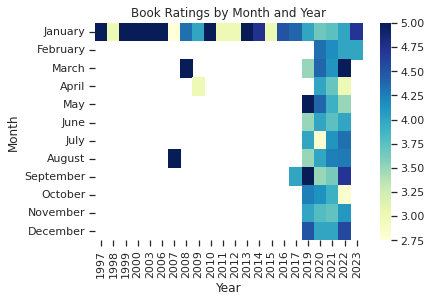

In [ ]:
# Remove entries that have NaT for date_read.
read_bookshelf_heatmap = read_bookshelf.copy()
read_bookshelf_heatmap = read_bookshelf_heatmap.dropna(subset=['date_read'])

# Create a column for the year and month
read_bookshelf_heatmap['year'] = read_bookshelf_heatmap['date_read'].dt.year
read_bookshelf_heatmap['month'] = read_bookshelf_heatmap['date_read'].dt.month

# Create a pivot table of the books read, with year and month as the index, and my_rating as the values
pivot_table = read_bookshelf_heatmap.pivot_table(index='month', columns='year', values='my_rating')

# Create a list of month names to use as the row labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Use the pivot table to create a heat map, with the values as the color map
sns.heatmap(pivot_table, cmap='YlGnBu', yticklabels=month_names)

# Add labels for the x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Month')

# Add a title to the plot
plt.title('Book Ratings by Month and Year')

# Show the plot
plt.show()

##Heat map of Book Ratings by Week and Year

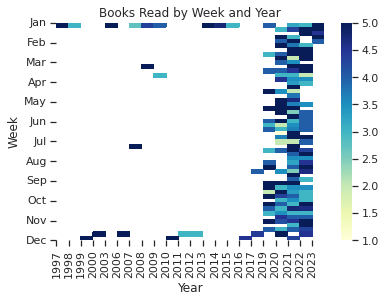

In [ ]:
# Remove entries that have NaT for date_read.
read_bookshelf_heatmap = read_bookshelf.copy()
read_bookshelf_heatmap = read_bookshelf_heatmap.dropna(subset=['date_read'])

# Create a column for the year and month
read_bookshelf_heatmap['year'] = read_bookshelf_heatmap['date_read'].dt.year
read_bookshelf_heatmap['month'] = read_bookshelf_heatmap['date_read'].dt.month
read_bookshelf_heatmap['week'] = read_bookshelf_heatmap['date_read'].dt.isocalendar().week

# Create a pivot table with week and year as the index, and my_rating as the values
pivot_table = read_bookshelf_heatmap.pivot_table(index='week', columns='year', values='my_rating')

# Create a list of week labels to use as the row labels
week_labels = ['Week {}'.format(week) for week in range(1, 53)]

# Create a list of month labels to use as the y-axis labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Plot a heatmap of the pivot table, using YlGnBu color map
sns.heatmap(pivot_table, cmap='YlGnBu')

# Add labels for the x-axis and y-axis
plt.xlabel('Year')
plt.ylabel('Week')

# Set custom ticks for x-axis and y-axis to limit the data shown
plt.xticks(np.arange(len(pivot_table.columns)), pivot_table.columns)
ytick_locations = np.linspace(0, 52, num=12, endpoint=True)
plt.yticks(ytick_locations, month_labels)

# Add a title to the plot
plt.title('Books Read by Week and Year')

# Show the plot
plt.show()


# Number of books read by author

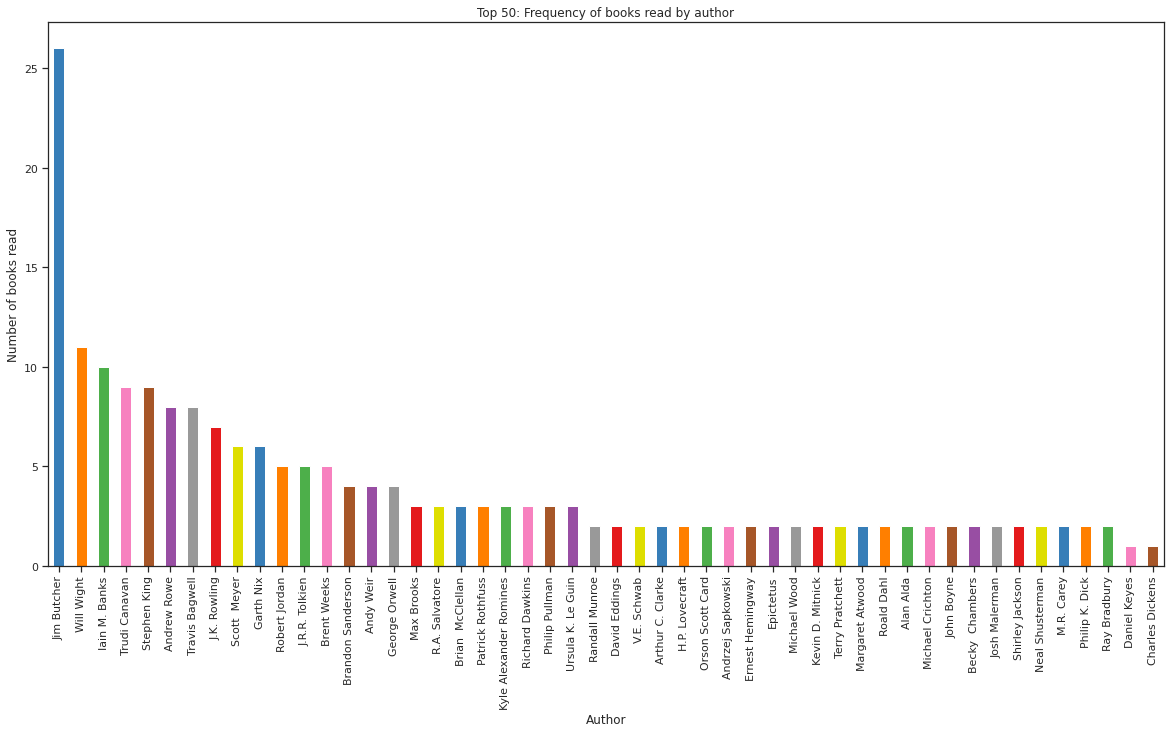

In [ ]:
#Plot the frequency of the top 50 books read by author, sorted from highest to lowest
author_counts = read_bookshelf['author'].value_counts()
top_50_authors = author_counts[:50]
top_50_authors.plot(kind='bar', figsize=(20,10), color=CB_color_cycle)
plt.xlabel('Author')
plt.ylabel('Number of books read')
plt.title('Top 50: Frequency of books read by author')

#Show the plot
plt.show()

# Genres

From now on, I'm going to be making use of the genres and read dates from the enhanced CSV as described in the beginning.

First, we'll need to do some cleaning. I'm going to save the top 3 genres only, I think more than that is likely bloat.

In [ ]:
# Some are NaN, so we will need to remove those for further genres analysis.
read_bookshelf = read_bookshelf.dropna(subset=['genres'])
to_read_bookshelf = to_read_bookshelf.dropna(subset=['genres'])

# next, let's do something about the multiple genres per book and the noise in the data.
# let's just allow a maximum of three genres per book, where every book has at least one primary genre.

# Split the genres column into separate entries for each book
read_genre_df = read_bookshelf['genres'].str.split(";", expand=True)
to_read_genre_df = to_read_bookshelf['genres'].str.split(";", expand=True)

# Concatenate the newly created data frame with the original data frame
read_bookshelf = pd.concat([read_bookshelf, read_genre_df], axis=1)
to_read_bookshelf = pd.concat([to_read_bookshelf, to_read_genre_df], axis=1)

for i, row in read_bookshelf.iterrows():
    for j in range(3):
        if pd.notnull(row[j]):
            genre = row[j].split("|")[0].lower()
            genre = genre.replace("lit rpg", "litrpg")
            genre = genre.replace("sci fi", "science fiction")
            genre = genre.replace("scifi", "science fiction")
            genre = genre.replace("ya", "young adult")
            read_bookshelf.at[i, j] = genre

for i, row in to_read_bookshelf.iterrows():
    for j in range(3):
        if pd.notnull(row[j]):
            genre = row[j].split("|")[0].lower()
            genre = genre.replace("lit rpg", "litrpg")
            genre = genre.replace("sci fi", "science fiction")
            genre = genre.replace("scifi", "science fiction")
            genre = genre.replace("ya", "young adult")
            to_read_bookshelf.at[i, j] = genre

# Remove any empty genre columns
read_bookshelf.dropna(subset=[0, 1, 2], inplace=True)
to_read_bookshelf.dropna(subset=[0, 1, 2], inplace=True)

# Rename the genre columns
read_bookshelf.rename(columns={0:'genre_1', 1:'genre_2', 2:'genre_3'}, inplace=True)
to_read_bookshelf.rename(columns={0:'genre_1', 1:'genre_2', 2:'genre_3'}, inplace=True)

# Drop the original "genres" column
read_bookshelf.drop(columns=['genres'], inplace=True)
for i in range(3, read_genre_df.shape[1]):
    read_bookshelf.drop(columns=[i], inplace=True)
to_read_bookshelf.drop(columns=['genres'], inplace=True)
for i in range(3, read_genre_df.shape[1]):
    to_read_bookshelf.drop(columns=[i], inplace=True)


# Dates

The dates are a bit of a mess. Let's clean them up.

In [ ]:
def split_dates(df):
  # split into a list of dates
  df['read_dates'] = df['read_dates'].str.split(';')
  # max read count is equal to max number of books read * 2
  max_read_count = df['read_count'].max() * 2
  # reset the index
  df = df.reset_index(drop=True)
  # for each potential book read
  for i in range(max_read_count):
    df[f'start_{i}'] = pd.NaT
    df[f'end_{i}'] = pd.NaT
    for j in range(len(df)):
      read_dates = df.at[j, 'read_dates']
      if isinstance(read_dates, float):
        continue
      if len(read_dates) <= i:
        continue
      start_date, end_date = read_dates[i].split(',')
      df.at[j, f'start_{i}'] = pd.to_datetime(start_date.strip())
      df.at[j, f'end_{i}'] = pd.to_datetime(end_date.strip())
  return df

#read_bookshelf = pd.read_pickle('read_bookshelf.pkl')
read_bookshelf = split_dates(read_bookshelf)

# Distribution of ratings for each genre

##Distribution of ratings for each genre - Genre 1 only

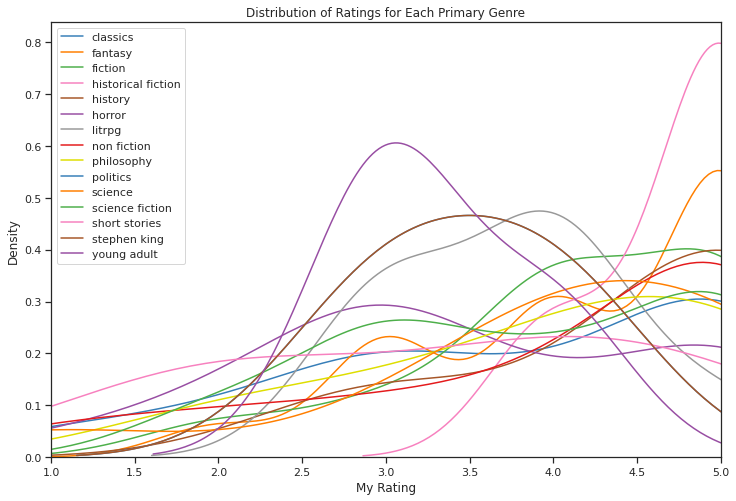

In [ ]:
#Create a copy of the original dataframe to avoid modifying it
bookshelf_genre_1 = read_bookshelf.copy()

#Replace the genre column with the genre_1 column
bookshelf_genre_1['genre'] = bookshelf_genre_1['genre_1']

#Group the dataframe by the genre column
grouped = bookshelf_genre_1.groupby(by='genre')['my_rating']

#Set the figure size
plt.figure(figsize=(12, 8))

#Plot the kernel density estimate for each genre that has more than 0 variance
for name, group in grouped:
    if group.var() > 0:
        sns.kdeplot(group, label=name)

#Add x and y labels, title and legend
plt.xlabel('My Rating')
plt.ylabel('Density')
plt.title('Distribution of Ratings for Each Primary Genre')
plt.legend()
plt.xlim(1, 5)

#Show the plot
plt.show()

## Distribution of ratings for each genre - all genres

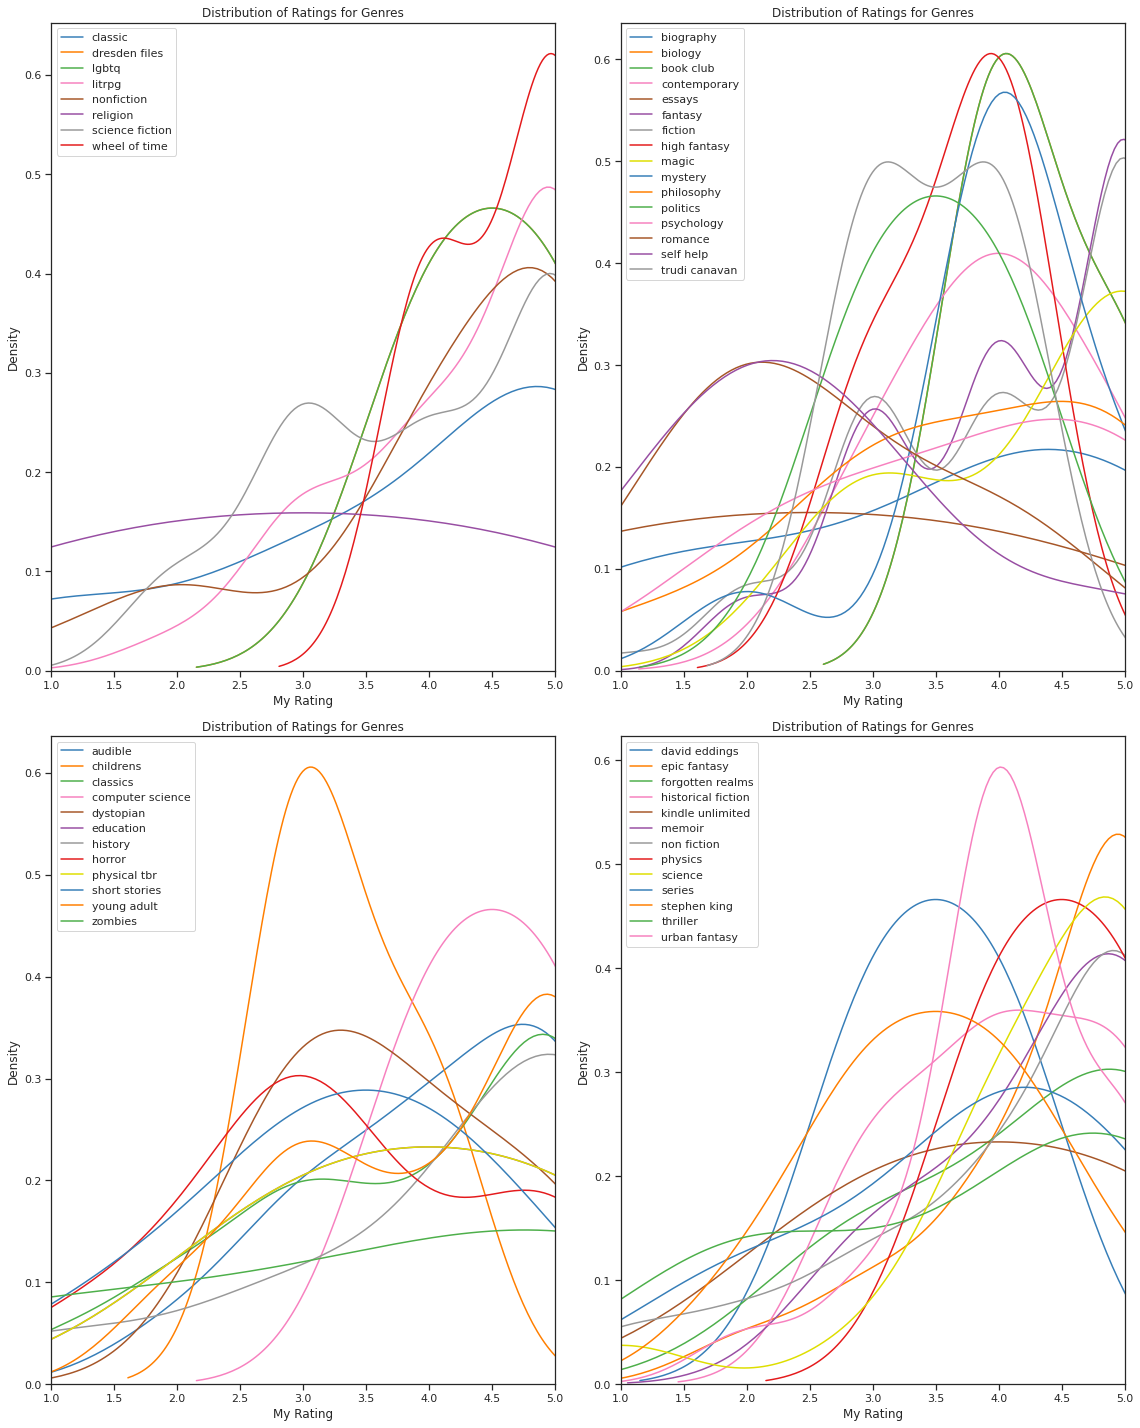

In [ ]:
# Create a copy of the original dataframe to avoid modifying it
bookshelf_all_genres = read_bookshelf.copy()

# Melt the dataframe to convert the genre_1, genre_2, and genre_3 columns into rows
bookshelf_all_genres = bookshelf_all_genres.melt(id_vars=['my_rating'], value_vars=['genre_1', 'genre_2', 'genre_3'], var_name='genre_column', value_name='genre')

# Drop any rows with missing genre values
bookshelf_all_genres = bookshelf_all_genres.dropna(subset=['genre'])

# Get the set of all genres
all_genres = set(bookshelf_all_genres['genre'])

# Divide the set of genres into four subsets of approximately equal size
num_genres = len(all_genres)
subset_size = num_genres // 4
genre_subsets = [list(all_genres)[i:i+subset_size] for i in range(0, num_genres, subset_size)]

# Set the figure size
plt.figure(figsize=(16, 20))

# Create four subplots, each with 25% of the genres
for i, genres in enumerate(genre_subsets):
    # Create a new dataframe with only the rows for the current subset of genres
    subset_df = bookshelf_all_genres[bookshelf_all_genres['genre'].isin(genres)]
    # Group the dataframe by the genre column
    grouped = subset_df.groupby(by='genre')['my_rating']
    # Create a new subplot
    ax = plt.subplot(2, 2, i+1)
    # Plot the kernel density estimate for each genre that has more than 0 variance
    for name, group in grouped:
        if group.var() > 0:
            sns.kdeplot(group, label=name, ax=ax)
    # Add x and y labels, title and legend
    ax.set_xlabel('My Rating')
    ax.set_ylabel('Density')
    ax.set_title('Distribution of Ratings for Genres')
    ax.legend()
    ax.set_xlim(1, 5)

# Show the plot
plt.tight_layout()
plt.show()


# Number of books / pages read by genre

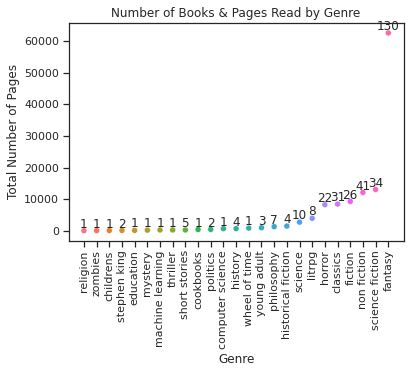

In [ ]:
#Count the number of books read by genre
book_count = read_bookshelf["genre_1"].value_counts().reset_index()
book_count.columns = ["genre_1", "count"]

#Group the data by genre
grouped_by_genre = read_bookshelf.groupby("genre_1")["number_of_pages"].sum().reset_index()
grouped_by_genre = grouped_by_genre.sort_values("number_of_pages")
grouped_by_genre = grouped_by_genre.merge(book_count, on="genre_1")

#Create a scatter plot of number of pages read by genre
sns.scatterplot(x="genre_1", y="number_of_pages", data=grouped_by_genre, hue="genre_1", legend=False)
for i, row in grouped_by_genre.iterrows():
    plt.text(row["genre_1"], row["number_of_pages"], str(row["count"]), ha="center", va="bottom")
plt.title("Number of Books & Pages Read by Genre")
plt.xlabel("Genre")
plt.ylabel("Total Number of Pages")
plt.xticks(rotation=90)

#Show the plot
plt.show()

# Number of Books Read by Year Published and Genre

## \# of Books Read By Year Published & Genre, all data

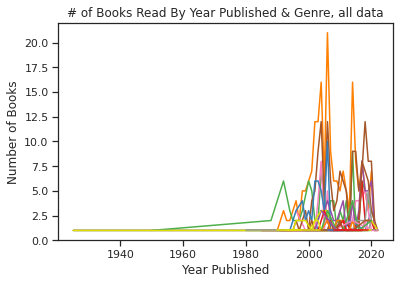

In [ ]:
# Create a list of all genres from genre_1, genre_2, and genre_3
genres = read_bookshelf[["genre_1", "genre_2", "genre_3"]].stack().dropna().unique()

# Initialize a list to store the counts
counts = []

# Fix the "years_df" loop to create a dataframe for each year
year_df = pd.DataFrame()
for year in read_bookshelf["year_published"].unique():
    year_df = pd.concat([year_df, read_bookshelf[read_bookshelf["year_published"] == year]])


# Initialize a list to store the counts
counts = []

# Iterate over each year
for year in read_bookshelf["year_published"].unique():
    year_df = read_bookshelf[read_bookshelf["year_published"] == year]
    # Iterate over each book
    for i, book in year_df.iterrows():
        for genre in [book["genre_1"], book["genre_2"], book["genre_3"]]:
            if not pd.isnull(genre):
                counts.append({"year_published": year, "genre": genre, "count": 1})

# Convert the list to a DataFrame
counts = pd.DataFrame(counts)

# Group the DataFrame by year_published and genre and sum the counts
book_count = counts.groupby(["year_published", "genre"]).sum().reset_index()


for genre in genres:
    read_genre_df = book_count[book_count["genre"] == genre]
    sns.lineplot(x="year_published", y="count", data=read_genre_df, label=genre, legend=False)

# Set labels
plt.xlabel("Year Published")
plt.ylabel("Number of Books")
plt.title("# of Books Read By Year Published & Genre, all data")
# Show the plot
plt.show()


Too much data, can't really be seen properly, and in my data I have some books published well in the past so the majority of 1900+ is stuffed into an unreadable mess.

Let's try to get the top 10 genres and plot them.

## \# of Books Read By Year Published & Genre, Top 10 Genres

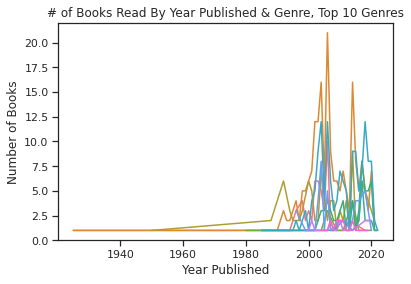

In [ ]:
# Group book_count dataframe by genre and get the count of each genre
genre_grouped = book_count.groupby(["genre"]).count()
genre_counts = genre_grouped["count"].sort_values(ascending=False)

# Take the first 10 genres
top_10_genres = genre_counts[:10]

# Create a new dataframe with only the top 10 genres
top_10_book_count = book_count[book_count["genre"].isin(top_10_genres.index)]

# Plot the top 10 genres using seaborn lineplot
sns.lineplot(x="year_published", y="count", data=top_10_book_count, hue="genre", legend=False)

# Set labels
plt.xlabel("Year Published")
plt.ylabel("Number of Books")
plt.title("# of Books Read By Year Published & Genre, Top 10 Genres")
# Show the plot
plt.show()

Still too much data, let's try to filter out the years before 1990.

## # of Books Read By Year Published & Genre, Top 10 Genres, 1990 Onwards

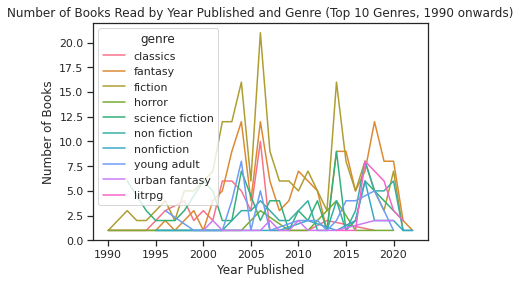

In [ ]:
# Filter the data to only include years after 1990
book_count_1990 = book_count[book_count["year_published"] >= 1990]

# Get the top 10 genres by count
top_10_genres = book_count_1990.groupby("genre")["count"].sum().sort_values(ascending=False).head(10).index

# Filter the data to only include the top 10 genres
book_count_1990 = book_count_1990[book_count_1990["genre"].isin(top_10_genres)]

# Create the line plot
sns.lineplot(x="year_published", y="count", hue="genre", data=book_count_1990)

# Add title and axis labels
plt.title("Number of Books Read by Year Published and Genre (Top 10 Genres, 1990 onwards)")
plt.xlabel("Year Published")
plt.ylabel("Number of Books")

# Show the plot
plt.show()

# Predicting Rating for to_read_bookshelf

To do this, we'll build a simple feed-foward NN using PyTorch and train it on the read_bookshelf data, specifically the my_rating, average_rating and genre_1 columns, in order to predict the future my_rating for the books I haven't read yet.


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# read data and split
df = read_bookshelf.copy()
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Convert categorical column genre_1 into numerical data using one-hot encoding
genre_dict = {genre: i for i, genre in enumerate(train_data["genre_1"].unique())}
train_data['genre_1'] = train_data['genre_1'].map(genre_dict)
test_data['genre_1'] = test_data['genre_1'].map(genre_dict)

#train tensors
train_inputs = torch.tensor(train_data[['average_rating', 'genre_1']].values, dtype=torch.float32)
train_labels = torch.tensor(train_data['my_rating'].values, dtype=torch.long)
# test tensors
test_inputs = torch.tensor(test_data[['average_rating', 'genre_1']].values, dtype=torch.float32)
test_labels = torch.tensor(test_data['my_rating'].values, dtype=torch.long)
# labels minus one for 0-4 ratings rather than 1-5
train_labels = train_labels - 1
test_labels = test_labels - 1

#Define the model
class RatingPredictor(nn.Module):
  def __init__(self, input_size, hidden_size, num_classes):
    super().__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.fc2 = nn.Linear(hidden_size, num_classes)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.fc2(x)
    return x

input_size = train_inputs.shape[1]
hidden_size = 100
num_classes = 5 # number of possible ratings (1 to 5)
criterion = nn.CrossEntropyLoss()
model = RatingPredictor(input_size, hidden_size, num_classes)
optimizer = optim.SGD(model.parameters(), lr=0.05)

# Train the model
num_epochs = 10
for epoch in range(num_epochs):
  # Forward pass
  outputs = model(train_inputs)
  loss = criterion(outputs, train_labels)
  # Backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 10 == 0:
      print (f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [10/10], Loss: 2.4037


OK, that's the model trained. Let's try and see what happens when we predict the ratings.

## All Results

In [ ]:
# Create a copy of the to_read_bookshelf data
to_read_bookshelf_copy = to_read_bookshelf.copy()

# Convert categorical column genre_1 into numerical data using one-hot encoding
to_read_bookshelf_copy['genre_1'] = to_read_bookshelf_copy['genre_1'].map(genre_dict)

# Create a tensor for the to_read_bookshelf data
to_read_inputs = torch.tensor(to_read_bookshelf_copy[['average_rating', 'genre_1']].values, dtype=torch.float32)

# Use the model to predict the ratings
with torch.no_grad():
  to_read_labels = model(to_read_inputs)
  to_read_labels = torch.argmax(to_read_labels, axis=1) + 1

# Convert the predicted ratings back to a pandas DataFrame
to_read_bookshelf_copy['my_rating'] = to_read_labels.numpy()

# Plot the results as a table of to_read_bookshelf['title'] with the newly predicted ratings
result = to_read_bookshelf_copy[['title', 'my_rating']]
print(result)

                                                 title  my_rating
0                                      The North Water          5
1                                   I Am the Messenger          5
3                                    The Ascent of Man          5
4    I Know Why the Caged Bird Sings (Maya Angelou'...          5
5                                 Bridge to Terabithia          5
..                                                 ...        ...
722                                     Winged Victory          1
723               Sum: Forty Tales from the Afterlives          5
724        Assassin's Apprentice (Farseer Trilogy, #1)          5
725                            Idlewild (Idlewild, #1)          5
731        Magician: Apprentice (The Riftwar Saga, #1)          5

[361 rows x 2 columns]


Bit hard to read, I had hundreds of books in my to_read shelf. Let's allow users to input a book name (and we can error check it for similarity to titles in the to_read bookshelf) and show the rating and prediction confidence rate for it.

## Querying Results

In [ ]:
# If fuzzywuzzy is not already installed, install it through the pip command.
try:
    import fuzzywuzzy
    from fuzzywuzzy import process
    from fuzzywuzzy import fuzz
except ImportError:
    !pip install fuzzywuzzy python-Levenshtein
    import fuzzywuzzy
    from fuzzywuzzy import process
    from fuzzywuzzy import fuzz

# take in a title and a list of titles and return the closest match (if any)
def find_closest_match(title, title_list):
    title_list = [title.lower() for title in title_list]
    title = title.lower()
    
    if title in title_list:
        return title
    max_ratio = 0
    closest_match = None
    for t in title_list:
        ratio = fuzz.ratio(title, t)
        if ratio > max_ratio:
            max_ratio = ratio
            closest_match = t
    return closest_match

# This loop prompts the user for a book title and continues until the user enters 'q' to quit.
while True:
    title = input("Enter a book title (or q to quit): ")
    if title.lower() == 'q':
        break
    closest_match = find_closest_match(title, to_read_bookshelf['title'].tolist())
    if closest_match:
        try:
            idx = to_read_bookshelf[to_read_bookshelf['title'].str.lower() == closest_match].index[0]
        except IndexError:
            print("No close match found in the data. Please enter a different title.")
            continue

        if idx >= len(to_read_inputs):
          print("No match found in the data. Please enter a different title.")
          continue

        # Use the inputs corresponding to the closest match to make a prediction.
        inputs = to_read_inputs[idx].reshape(1, -1)
        prediction = model(inputs)
        pred_rating = prediction.argmax().item() + 1
        confidence = torch.nn.functional.softmax(prediction, dim=1).max().item()
        print(f"The predicted rating for '{closest_match}' is {pred_rating} with a confidence of {confidence:.2f}")
    else:
        print("No close match found. Please enter a different title.")


Enter a book title (or q to quit): q


# Gantt chart of books read

Let's make use of the data we cleaned earlier for the enhanced csv.

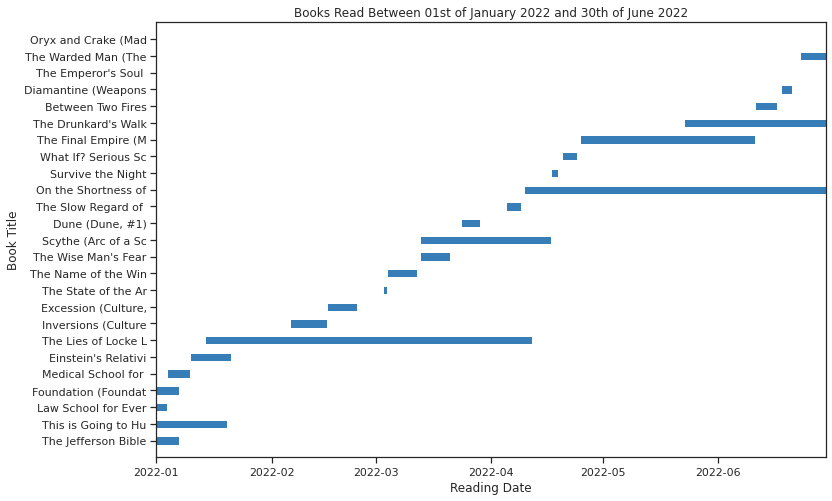

In [ ]:
# Define the start and end dates
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2022-06-30')

# Filter the dataframe to only include rows where the book was read between the start and end dates
df = read_bookshelf[(read_bookshelf['end_0'] >= start_date) & (read_bookshelf['start_0'] <= end_date)]

# Create a new dataframe with the book title and start/end dates
# the number of pages is for the plot after this one
df_tasks = df[['title', 'start_0', 'end_0', 'number_of_pages']]
df_tasks = df_tasks.copy()
df_tasks['title'] = df_tasks['title'].str.slice(0,19)
df_tasks['start_0'] = pd.to_datetime(df_tasks['start_0'])
df_tasks['end_0'] = pd.to_datetime(df_tasks['end_0'])
df_tasks['duration'] = df_tasks['end_0'] - df_tasks['start_0']

# Sort the dataframe by start date
df_tasks = df_tasks.sort_values('start_0')

# Create a new column for the y-axis, which will be the book title
df_tasks['y'] = range(1, len(df_tasks)+1)

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the horizontal bars for each task
ax.barh(df_tasks['y'], df_tasks['duration'], left=df_tasks['start_0'], height=0.5, align='center')

# Set the x-axis limits and format the ticks as dates
ax.set_xlim(start_date, end_date)
ax.xaxis_date()

# Set the y-axis limits and labels
ax.set_ylim(0, len(df_tasks)+1)
ax.set_yticks(df_tasks['y'])
ax.set_yticklabels(df_tasks['title'])

# make title self update depending on dates selected above
def day_suffix(day):
    if 11 <= day <= 13:
        return "th"
    else:
        return {1: "st", 2: "nd", 3: "rd"}.get(day % 10, "th")

start_suffix = day_suffix(start_date.day)
end_suffix = day_suffix(end_date.day)

start_str = start_date.strftime(f"%d{start_suffix} of %B %Y")
end_str = end_date.strftime(f"%d{end_suffix} of %B %Y")


ax.set_title(f"Books Read Between {start_str} and {end_str}")
ax.set_xlabel('Reading Date')
ax.set_ylabel('Book Title')

# Show the plot
plt.show()


# Predict Read Times - Again!

This time we'll use the new data, which I think is more reliable.

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1463.1743 - val_loss: 13575.9746
Epoch 2/10
1/1 [==============================] - 0s 42ms/step - loss: 1460.2592 - val_loss: 13563.3379
Epoch 3/10
1/1 [==============================] - 0s 37ms/step - loss: 1457.6779 - val_loss: 13551.4736
Epoch 4/10
1/1 [==============================] - 0s 40ms/step - loss: 1455.2729 - val_loss: 13540.2676
Epoch 5/10
1/1 [==============================] - 0s 41ms/step - loss: 1452.9673 - val_loss: 13529.6035
Epoch 6/10
1/1 [==============================] - 0s 44ms/step - loss: 1450.7208 - val_loss: 13519.3809
Epoch 7/10
1/1 [==============================] - 0s 46ms/step - loss: 1448.5126 - val_loss: 13509.5127
Epoch 8/10
1/1 [==============================] - 0s 41ms/step - loss: 1446.3297 - val_loss: 13499.9316
Epoch 9/10
1/1 [==============================] - 0s 42ms/step - loss: 1444.1658 - val_loss: 13490.5830
Epoch 10/10
1/1 [==============================] - 0s 154ms/step


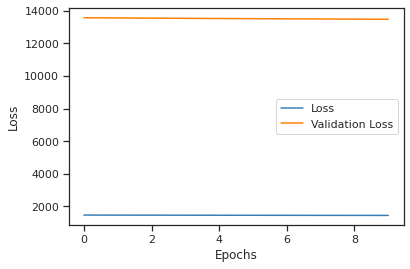

In [ ]:
#Specify the date range to be considered
dates = ['2020-01-01', '2022-12-31']

#Filter the data based on the specified date range
df_tasks = df_tasks[(df_tasks['duration'] > pd.to_timedelta(0)) & (df_tasks['duration'] <= pd.to_timedelta('365 days'))]

# Remove rows with missing values for the 'duration' column
df_tasks = df_tasks.dropna(subset=['duration'])
df_tasks = df_tasks.dropna(subset=['number_of_pages'])

#Get the duration for each task in df_tasks as the target variable
y = df_tasks['duration'].dt.total_seconds() / (24 * 3600)

#Get the number of pages for each task in df_tasks as the input features
X = df_tasks['number_of_pages'].values

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Reshape the input features to be 3D for the RNN
X_train = np.array(X_train).reshape((-1, 1, 1))
X_test = np.array(X_test).reshape((-1, 1, 1))

#Build the RNN model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model on the training data
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

#Predict the duration for the tasks in df_tasks
to_do_X = df_tasks['number_of_pages'].values
to_do_X = np.array(to_do_X).reshape((-1, 1, 1))
to_do_y_pred = model.predict(to_do_X)
to_do_y_pred = to_do_y_pred.reshape(-1)

#compile results
results = pd.DataFrame({'Estimated Duration': to_do_y_pred, 'Task': df_tasks['title'], 'Page Count': df_tasks['number_of_pages']})

#Reset index
results.reset_index(drop=True, inplace=True)

#Plot loss vs validation loss over epochs
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 24ms/step
R2: -0.92


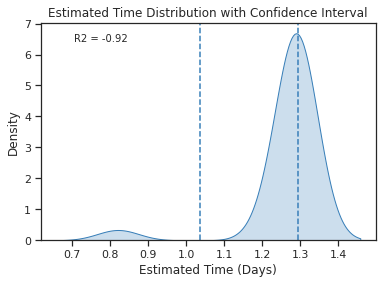

In [ ]:
# calculate r2
r2 = r2_score(y_test, model.predict(X_test))
print("R2: {:.2f}".format(r2))

#Plot the estimated times using seaborn
sns.kdeplot(results['Estimated Duration'], fill=True)
plt.xlabel('Estimated Time (Days)')
plt.ylabel('Density')
plt.title('Estimated Time Distribution with Confidence Interval')

#Calculate the lower and upper bounds of the 95% confidence interval
lower, upper = np.percentile(results['Estimated Duration'], [2.5, 97.5])

#Plot the lower and upper bounds
plt.axvline(x=lower, linestyle='--')
plt.axvline(x=upper, linestyle='--')

# Add the R2 score to the top left corner of the plot
plt.text(0.1, 0.95, 'R2 = {:.2f}'.format(r2), transform=plt.gca().transAxes, fontsize=10, va='top', ha='left')

plt.show()

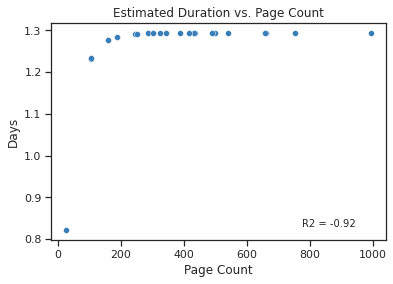

In [ ]:
#Plot a scatterplot of the Estimated Duration and Page Count columns in the results dataframe
sns.scatterplot(x='Page Count', y='Estimated Duration', data=results)
plt.title("Estimated Duration vs. Page Count")
plt.ylabel("Days")

# Add the R2 score to the bottom right corner of the plot
plt.text(0.75, 0.1, 'R2 = {:.2f}'.format(r2), transform=plt.gca().transAxes, fontsize=10, va='top', ha='left')

#Show the plot
plt.show()


#Word Cloud for Genres

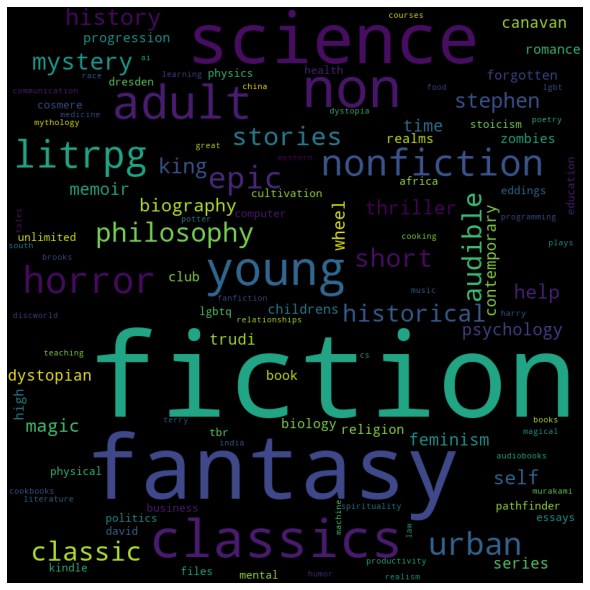

In [ ]:
# Get all genres
genres = " ".join(genre for genre in bookshelf_all_genres['genre'])

# Remove stopwords and non-alphanumeric characters
word_tokens = [word for word in word_tokenize(genres.lower()) if word not in stopwords and word.isalnum()]

# Count the frequency of each word
word_counts = Counter(word_tokens)

# Plot the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate_from_frequencies(word_counts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()


# Sentiment Analysis

Sentiment analysis is analyzing a text for emotional content. Let's see what the titles of the books read flag in terms emotional content.

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

# Get all titles and ratings
titles = read_bookshelf['title'].copy()
ratings = read_bookshelf['my_rating'].copy()

# Preprocess each title and perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = []
for title in titles:
    # Remove stopwords and special symbols
    filtered_title = " ".join([word for word in title.lower().split() if word not in stopwords])
    filtered_title = ''.join(e for e in filtered_title if (e.isalnum() or e.isspace()))
    
    # Perform sentiment analysis
    sentiment = sia.polarity_scores(filtered_title)
    sentiment_scores.append(sentiment['compound'])

# Create a dataframe to store the sentiment analysis, title, and rating
#df = pd.DataFrame({'Title': titles, 'Sentiment': sentiment_scores, 'Rating': ratings})

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


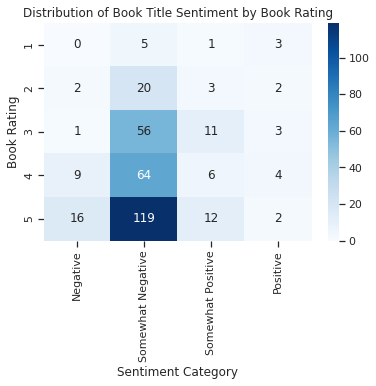

In [ ]:
# Create a dataframe with sentiment score, book rating, and count
df = pd.DataFrame({'Sentiment': sentiment_scores,
                   'Rating': read_bookshelf['my_rating'],
                   'Count': 1})

# Bin the sentiment scores into categories
df['Sentiment Category'] = pd.cut(df['Sentiment'], bins=[-1, -0.5, 0, 0.5, 1],
                                  labels=['Negative', 'Somewhat Negative', 'Somewhat Positive', 'Positive'])

# Group by rating and sentiment category to get the count for each combination
df_agg = df.groupby(['Rating', 'Sentiment Category']).agg({'Count': 'sum'}).reset_index()

# Reshape the data to wide format for plotting
heatmap_data = df_agg.pivot('Rating', 'Sentiment Category', 'Count')

# Create the heatmap
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')

# Set the axis labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Book Rating')
plt.title('Distribution of Book Title Sentiment by Book Rating')
plt.show()


## Review Sentiment Analysis

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

# Get all reviews, titles, and ratings
reviews = read_bookshelf['my_review'].copy()
titles = read_bookshelf['title'].copy()
ratings = read_bookshelf['my_rating'].copy()

# Filter out books without a review
has_review_mask = reviews.notnull()
reviews = reviews[has_review_mask]
titles = titles[has_review_mask]
ratings = ratings[has_review_mask]

# Preprocess each review and perform sentiment analysis
sia = SentimentIntensityAnalyzer()
sentiment_scores = []
for review in reviews:
    # Remove stopwords and special symbols
    filtered_review = " ".join([word for word in review.lower().split() if word not in stopwords])
    filtered_review = ''.join(e for e in filtered_review if (e.isalnum() or e.isspace()))

    # Perform sentiment analysis
    sentiment = sia.polarity_scores(filtered_review)
    sentiment_scores.append(sentiment['compound'])

# Create a dataframe to store the sentiment analysis, title, review, and rating
df = pd.DataFrame({'Title': titles, 'Review': reviews, 'Sentiment': sentiment_scores, 'Rating': ratings})


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
df

,Title,Review,Sentiment,Rating
0,Kindred,An excellent book for showing the likely persp...,0.8979,5
1,"Dread Nation (Dread Nation, #1)",Loved the main character - a very cool aesthet...,0.8957,4
2,Invisible Women: Data Bias in a World Designed...,The book I will recommend to anyone belittling...,0.3612,5
3,Weapons of Math Destruction: How Big Data Incr...,Not as detailed as I'd hoped from a data scien...,0.4215,5
4,"All Systems Red (The Murderbot Diaries, #1)",Good but a bit too tidily wrapped up for my ki...,0.7430,4
...,...,...,...,...
290,"Ghost Story (The Dresden Files, #13)",The ending was fantastic. The rest of it was s...,0.7579,3
293,The Wandering Inn: Volume 1 (The Wandering Inn...,I listened to this on audible. I enjoyed the w...,0.7220,2
294,The Boy on the Bridge (The Girl With All the G...,"Not as enjoyable as the first, but still worth...",0.6249,3
297,The Road,Depressing but overall enjoyable tale of the r...,0.0772,4


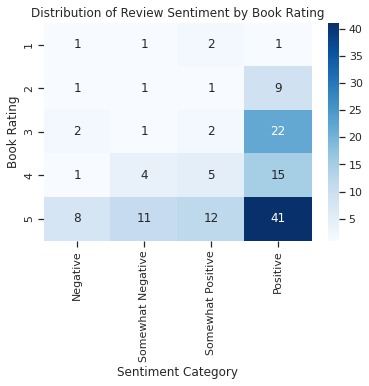

In [ ]:
# Bin the sentiment scores into categories
df['Sentiment Category'] = pd.cut(df['Sentiment'], bins=[-1, -0.5, 0, 0.5, 1],
                                  labels=['Negative', 'Somewhat Negative', 'Somewhat Positive', 'Positive'])

# Group by rating and sentiment category to get the count for each combination
df_agg = df.groupby(['Rating', 'Sentiment Category']).size().reset_index(name='Count')

# Reshape the data to wide format for plotting
heatmap_data = df_agg.pivot('Rating', 'Sentiment Category', 'Count')

# Create the heatmap
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')

# Set the axis labels and title
plt.xlabel('Sentiment Category')
plt.ylabel('Book Rating')
plt.title('Distribution of Review Sentiment by Book Rating')
plt.show()
